In [1]:
import pandas as pd
import numpy as np
from numpy import mean
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, f1_score, recall_score, precision_score

scores = pd.DataFrame(columns=['Model', 'Cross Val Score', 'Train Acc', 'Test Acc', 'Precision', 'Recall', 'F1-Score'])

In [2]:
df = pd.read_csv('../Data/CardioVascularRisk.csv')
# df = pd.read_csv('https://raw.githubusercontent.com/Zaid-N-Ansari/PG-Mini-Project/refs/heads/main/Data/CardioVascularRisk.csv')
df.drop(['id'], axis=1, inplace=True)
df_columns = df.columns

features = df_columns[:-1]
target = df_columns[-1]

df.sample(10).sort_index()

age  education sex is_smoking  cigsPerDay  BPMeds  prevalentStroke  \
204    59        4.0   F         NO         0.0     1.0                0   
327    58        2.0   F        YES        30.0     0.0                0   
852    54        2.0   F         NO         0.0     0.0                0   
1969   65        1.0   F         NO         0.0     1.0                0   
2378   66        1.0   F         NO         0.0     1.0                0   
2490   47        2.0   F         NO         0.0     0.0                0   
2763   39        2.0   F         NO         0.0     0.0                0   
3064   38        2.0   M        YES         5.0     0.0                0   
3067   57        1.0   F        YES         1.0     0.0                0   
3378   39        3.0   F        YES         NaN     0.0                0   

      prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  heartRate  \
204              1         0    282.0  135.0   87.0  28.96       72.0   
327              0         0    234.0  113.0   77.0  20.68       72.0   
852              0         0    243.0  138.0   79.0  21.93       75.0   
1969             1         0    342.0  168.5   98.5  23.87       75.0   
2378             1         0    290.0  152.5   90.0  23.63       80.0   
2490             0         0    174.0  118.0   86.5  26.15      110.0   
2763             1         0    226.0  146.0   86.0  24.41       85.0   
3064             0         0    243.0  130.5   85.5  19.53       85.0   
3067             1         0    254.0  146.5   81.0  41.61       72.0   
3378             0         0    197.0  126.5   76.5  19.71       55.0   

      glucose  TenYearCHD  
204       NaN           0  
327      67.0           0  
852      95.0           0  
1969     60.0           0  
2378     76.0           0  
2490     86.0           0  
2763     85.0           0  
3064     79.0           0  
3067     85.0           1  
3378     63.0           0

In [3]:
ndf = pd.DataFrame()
ndf['education'] = df['education'].astype(object)
ndf['sex']=df['sex'].astype(object)
ndf['is_smoking'] = df['is_smoking'].astype(object)
ndf['BPMeds'] = df['BPMeds'].astype(object)
ndf['prevalentStroke'] = df['prevalentStroke'].astype(object)
ndf['prevalentHyp'] = df['prevalentHyp'].astype(object)
ndf['diabetes'] = df['diabetes'].astype(object)

ndf.describe(include=['object']).T

count unique  top    freq
education        3303.0    4.0  1.0  1391.0
sex                3390      2    F    1923
is_smoking         3390      2   NO    1703
BPMeds           3346.0    2.0  0.0  3246.0
prevalentStroke    3390      2    0    3368
prevalentHyp       3390      2    0    2321
diabetes           3390      2    0    3303

In [4]:
df.describe().T

count        mean        std     min     25%     50%  \
age              3390.0   49.542183   8.592878   32.00   42.00   49.00   
education        3303.0    1.970936   1.019081    1.00    1.00    2.00   
cigsPerDay       3368.0    9.069477  11.879078    0.00    0.00    0.00   
BPMeds           3346.0    0.029886   0.170299    0.00    0.00    0.00   
prevalentStroke  3390.0    0.006490   0.080309    0.00    0.00    0.00   
prevalentHyp     3390.0    0.315339   0.464719    0.00    0.00    0.00   
diabetes         3390.0    0.025664   0.158153    0.00    0.00    0.00   
totChol          3352.0  237.074284  45.247430  107.00  206.00  234.00   
sysBP            3390.0  132.601180  22.292030   83.50  117.00  128.50   
diaBP            3390.0   82.883038  12.023581   48.00   74.50   82.00   
BMI              3376.0   25.794964   4.115449   15.96   23.02   25.38   
heartRate        3389.0   75.977279  11.971868   45.00   68.00   75.00   
glucose          3086.0   82.086520  24.244753   40.00   71.00   78.00   
TenYearCHD       3390.0    0.150737   0.357846    0.00    0.00    0.00   

                    75%    max  
age               56.00   70.0  
education          3.00    4.0  
cigsPerDay        20.00   70.0  
BPMeds             0.00    1.0  
prevalentStroke    0.00    1.0  
prevalentHyp       1.00    1.0  
diabetes           0.00    1.0  
totChol          264.00  696.0  
sysBP            144.00  295.0  
diaBP             90.00  142.5  
BMI               28.04   56.8  
heartRate         83.00  143.0  
glucose           87.00  394.0  
TenYearCHD         0.00    1.0

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3390 entries, 0 to 3389
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   age              3390 non-null   int64  
 1   education        3303 non-null   float64
 2   sex              3390 non-null   object 
 3   is_smoking       3390 non-null   object 
 4   cigsPerDay       3368 non-null   float64
 5   BPMeds           3346 non-null   float64
 6   prevalentStroke  3390 non-null   int64  
 7   prevalentHyp     3390 non-null   int64  
 8   diabetes         3390 non-null   int64  
 9   totChol          3352 non-null   float64
 10  sysBP            3390 non-null   float64
 11  diaBP            3390 non-null   float64
 12  BMI              3376 non-null   float64
 13  heartRate        3389 non-null   float64
 14  glucose          3086 non-null   float64
 15  TenYearCHD       3390 non-null   int64  
dtypes: float64(9), int64(5), object(2)
memory usage: 423.9+ KB


In [6]:
for col in df.columns:
	print(f'Unique values in {col}: {df[col].nunique()}')
	print(f'Missing values in {col}: {df[col].isnull().sum()}')
	print(f'Data type of {col}: {df[col].dtype}')
	print('-' * 35)

Unique values in age: 39
Missing values in age: 0
Data type of age: int64
-----------------------------------
Unique values in education: 4
Missing values in education: 87
Data type of education: float64
-----------------------------------
Unique values in sex: 2
Missing values in sex: 0
Data type of sex: object
-----------------------------------
Unique values in is_smoking: 2
Missing values in is_smoking: 0
Data type of is_smoking: object
-----------------------------------
Unique values in cigsPerDay: 32
Missing values in cigsPerDay: 22
Data type of cigsPerDay: float64
-----------------------------------
Unique values in BPMeds: 2
Missing values in BPMeds: 44
Data type of BPMeds: float64
-----------------------------------
Unique values in prevalentStroke: 2
Missing values in prevalentStroke: 0
Data type of prevalentStroke: int64
-----------------------------------
Unique values in prevalentHyp: 2
Missing values in prevalentHyp: 0
Data type of prevalentHyp: int64
-------------------

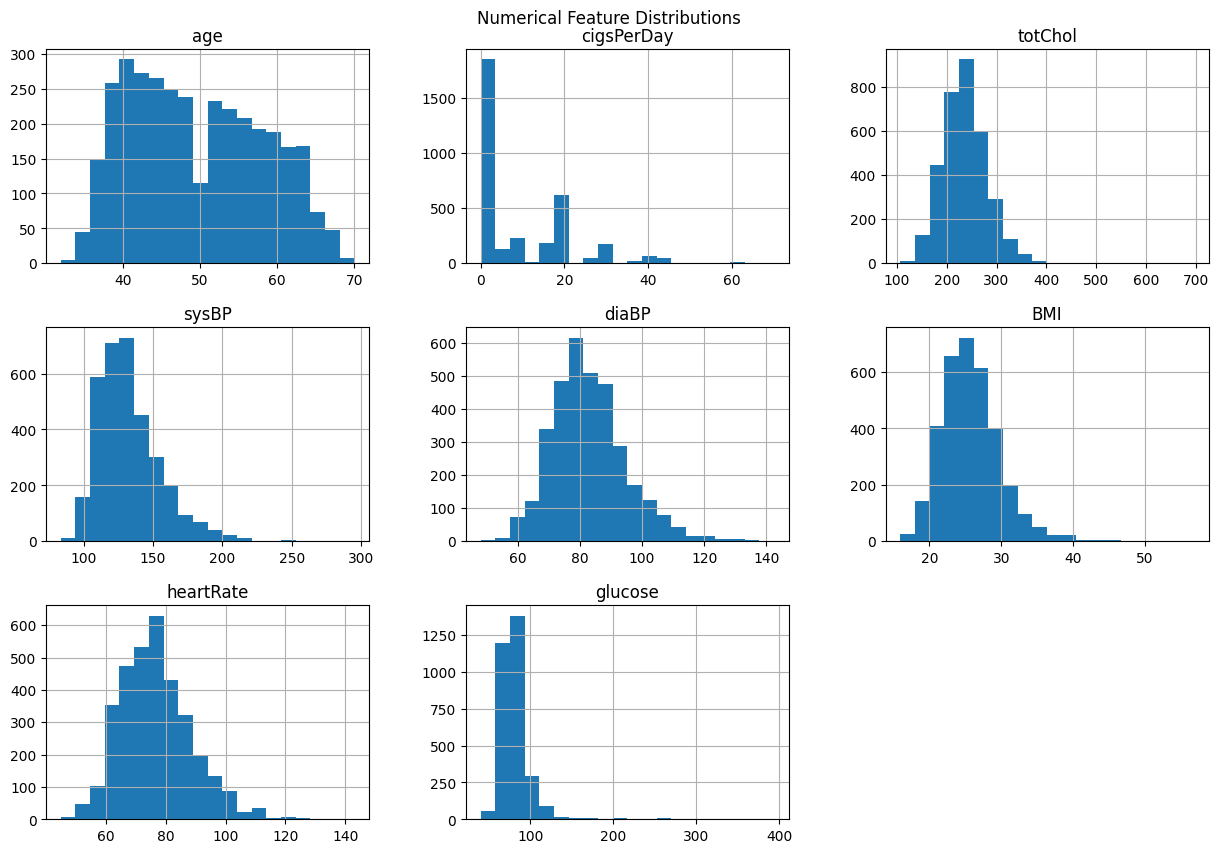

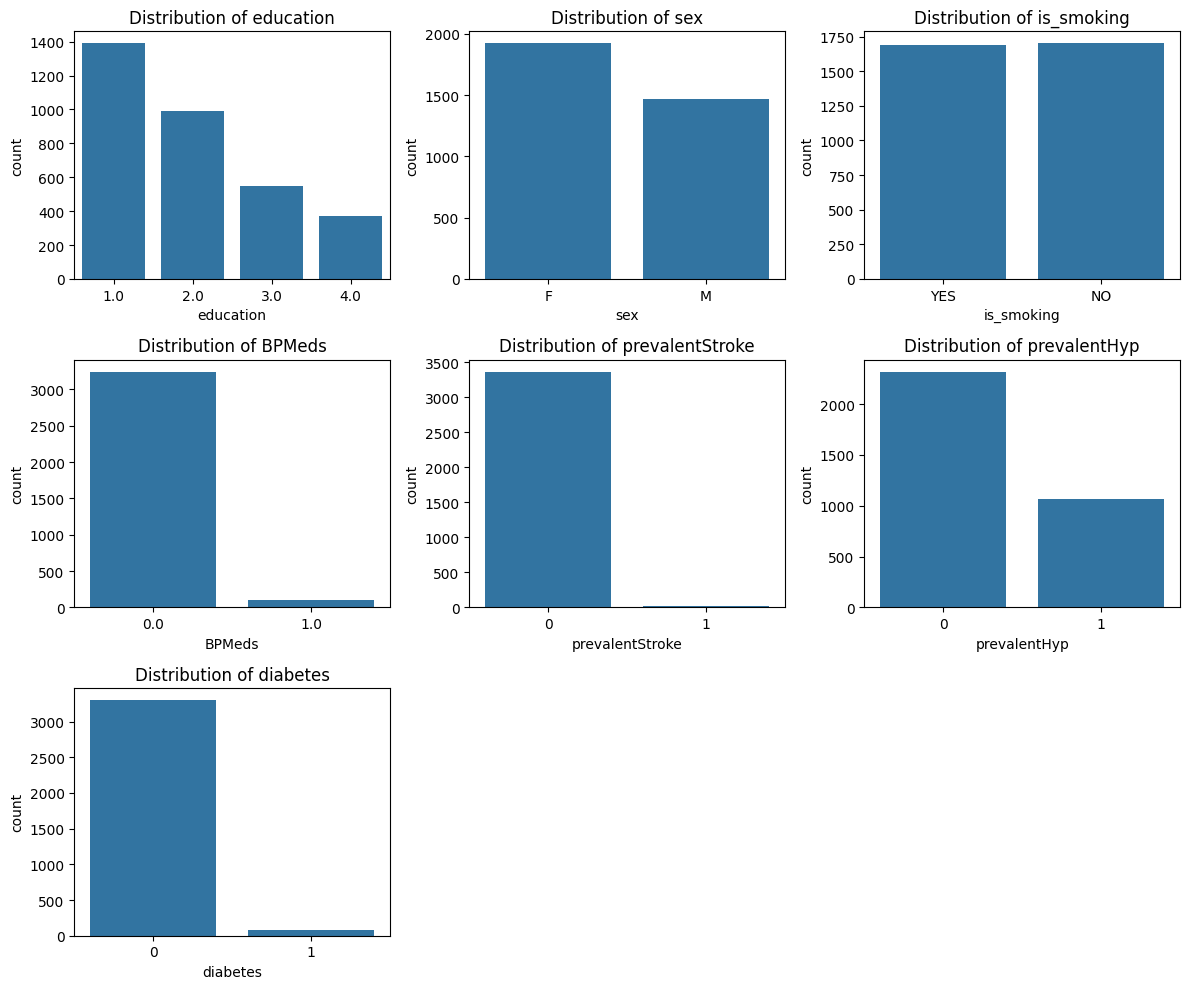

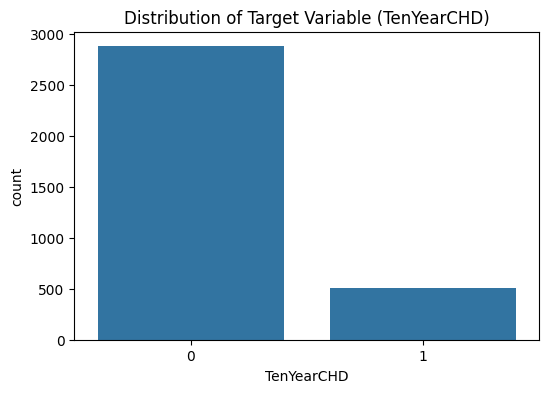

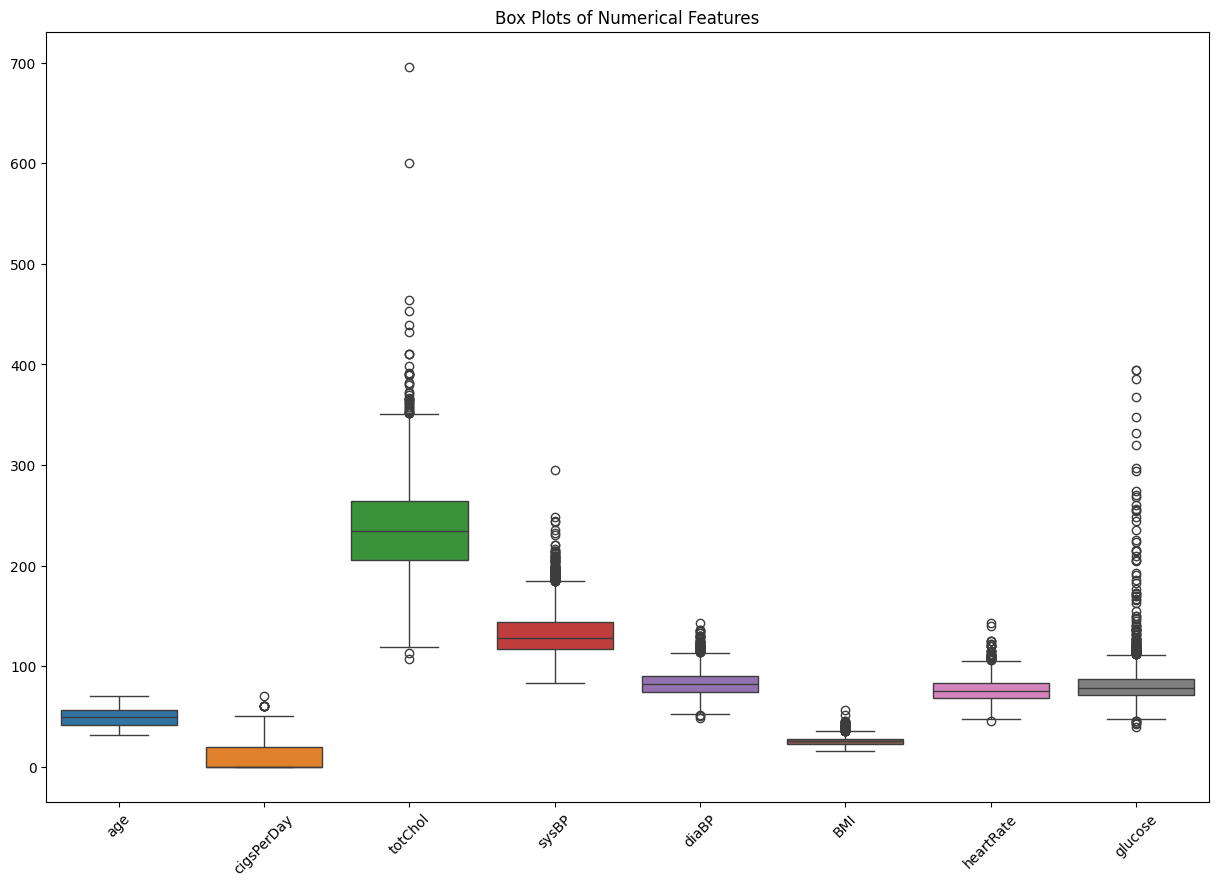

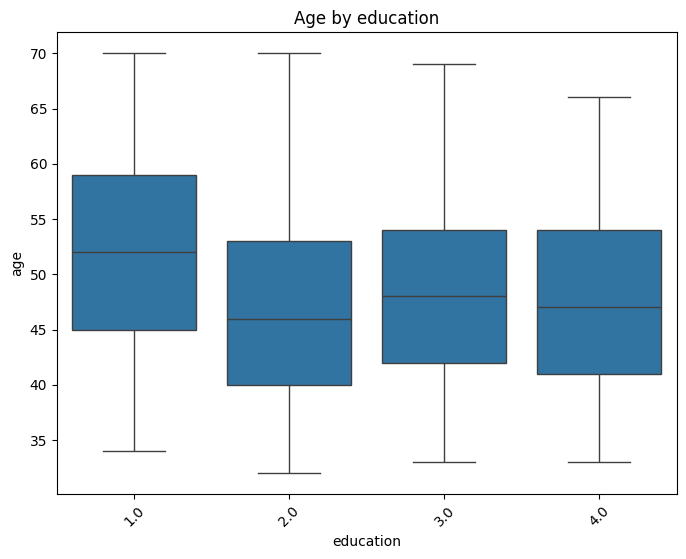

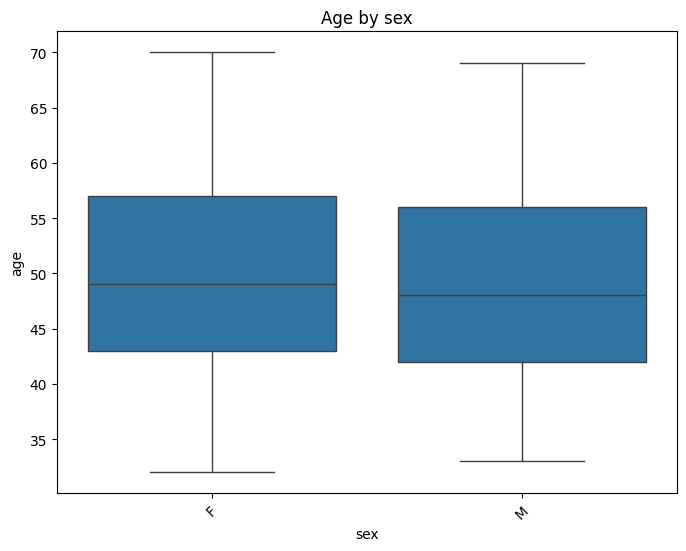

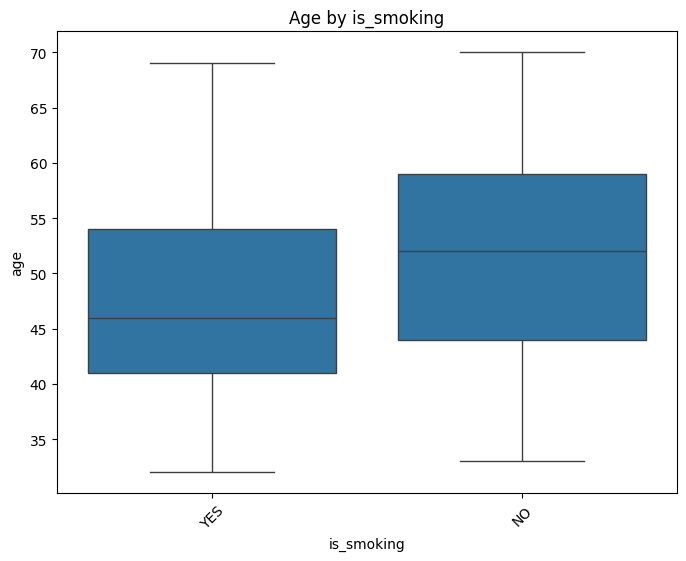

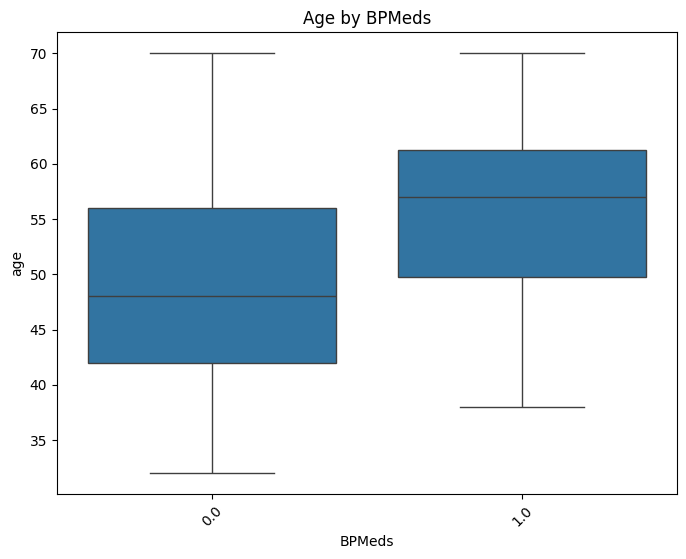

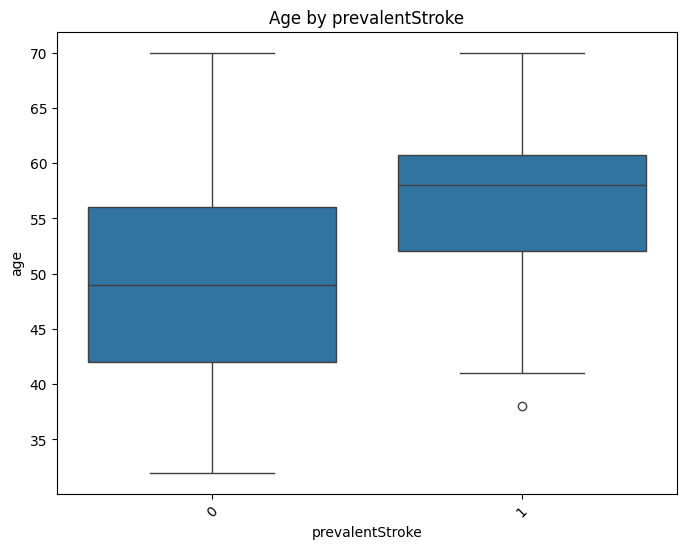

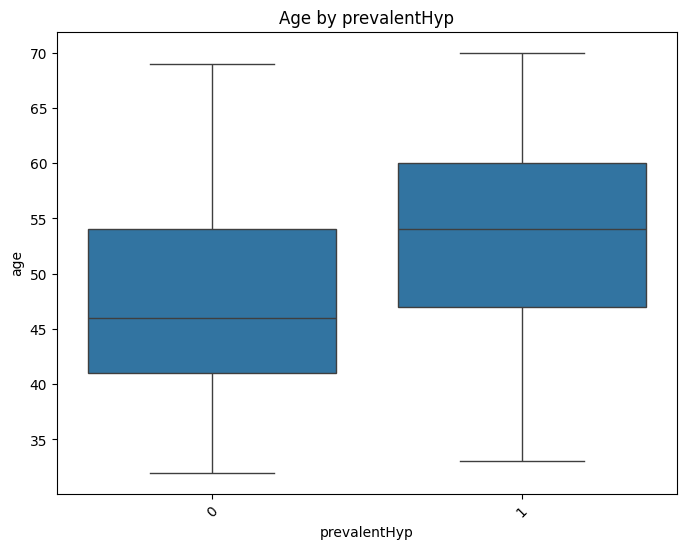

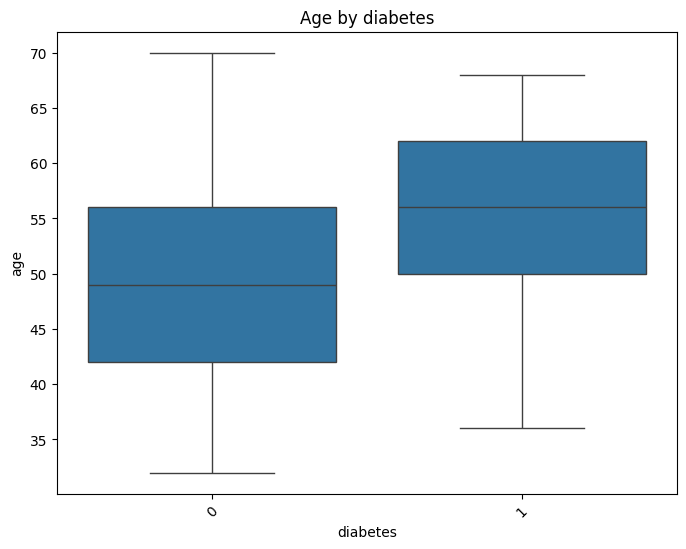

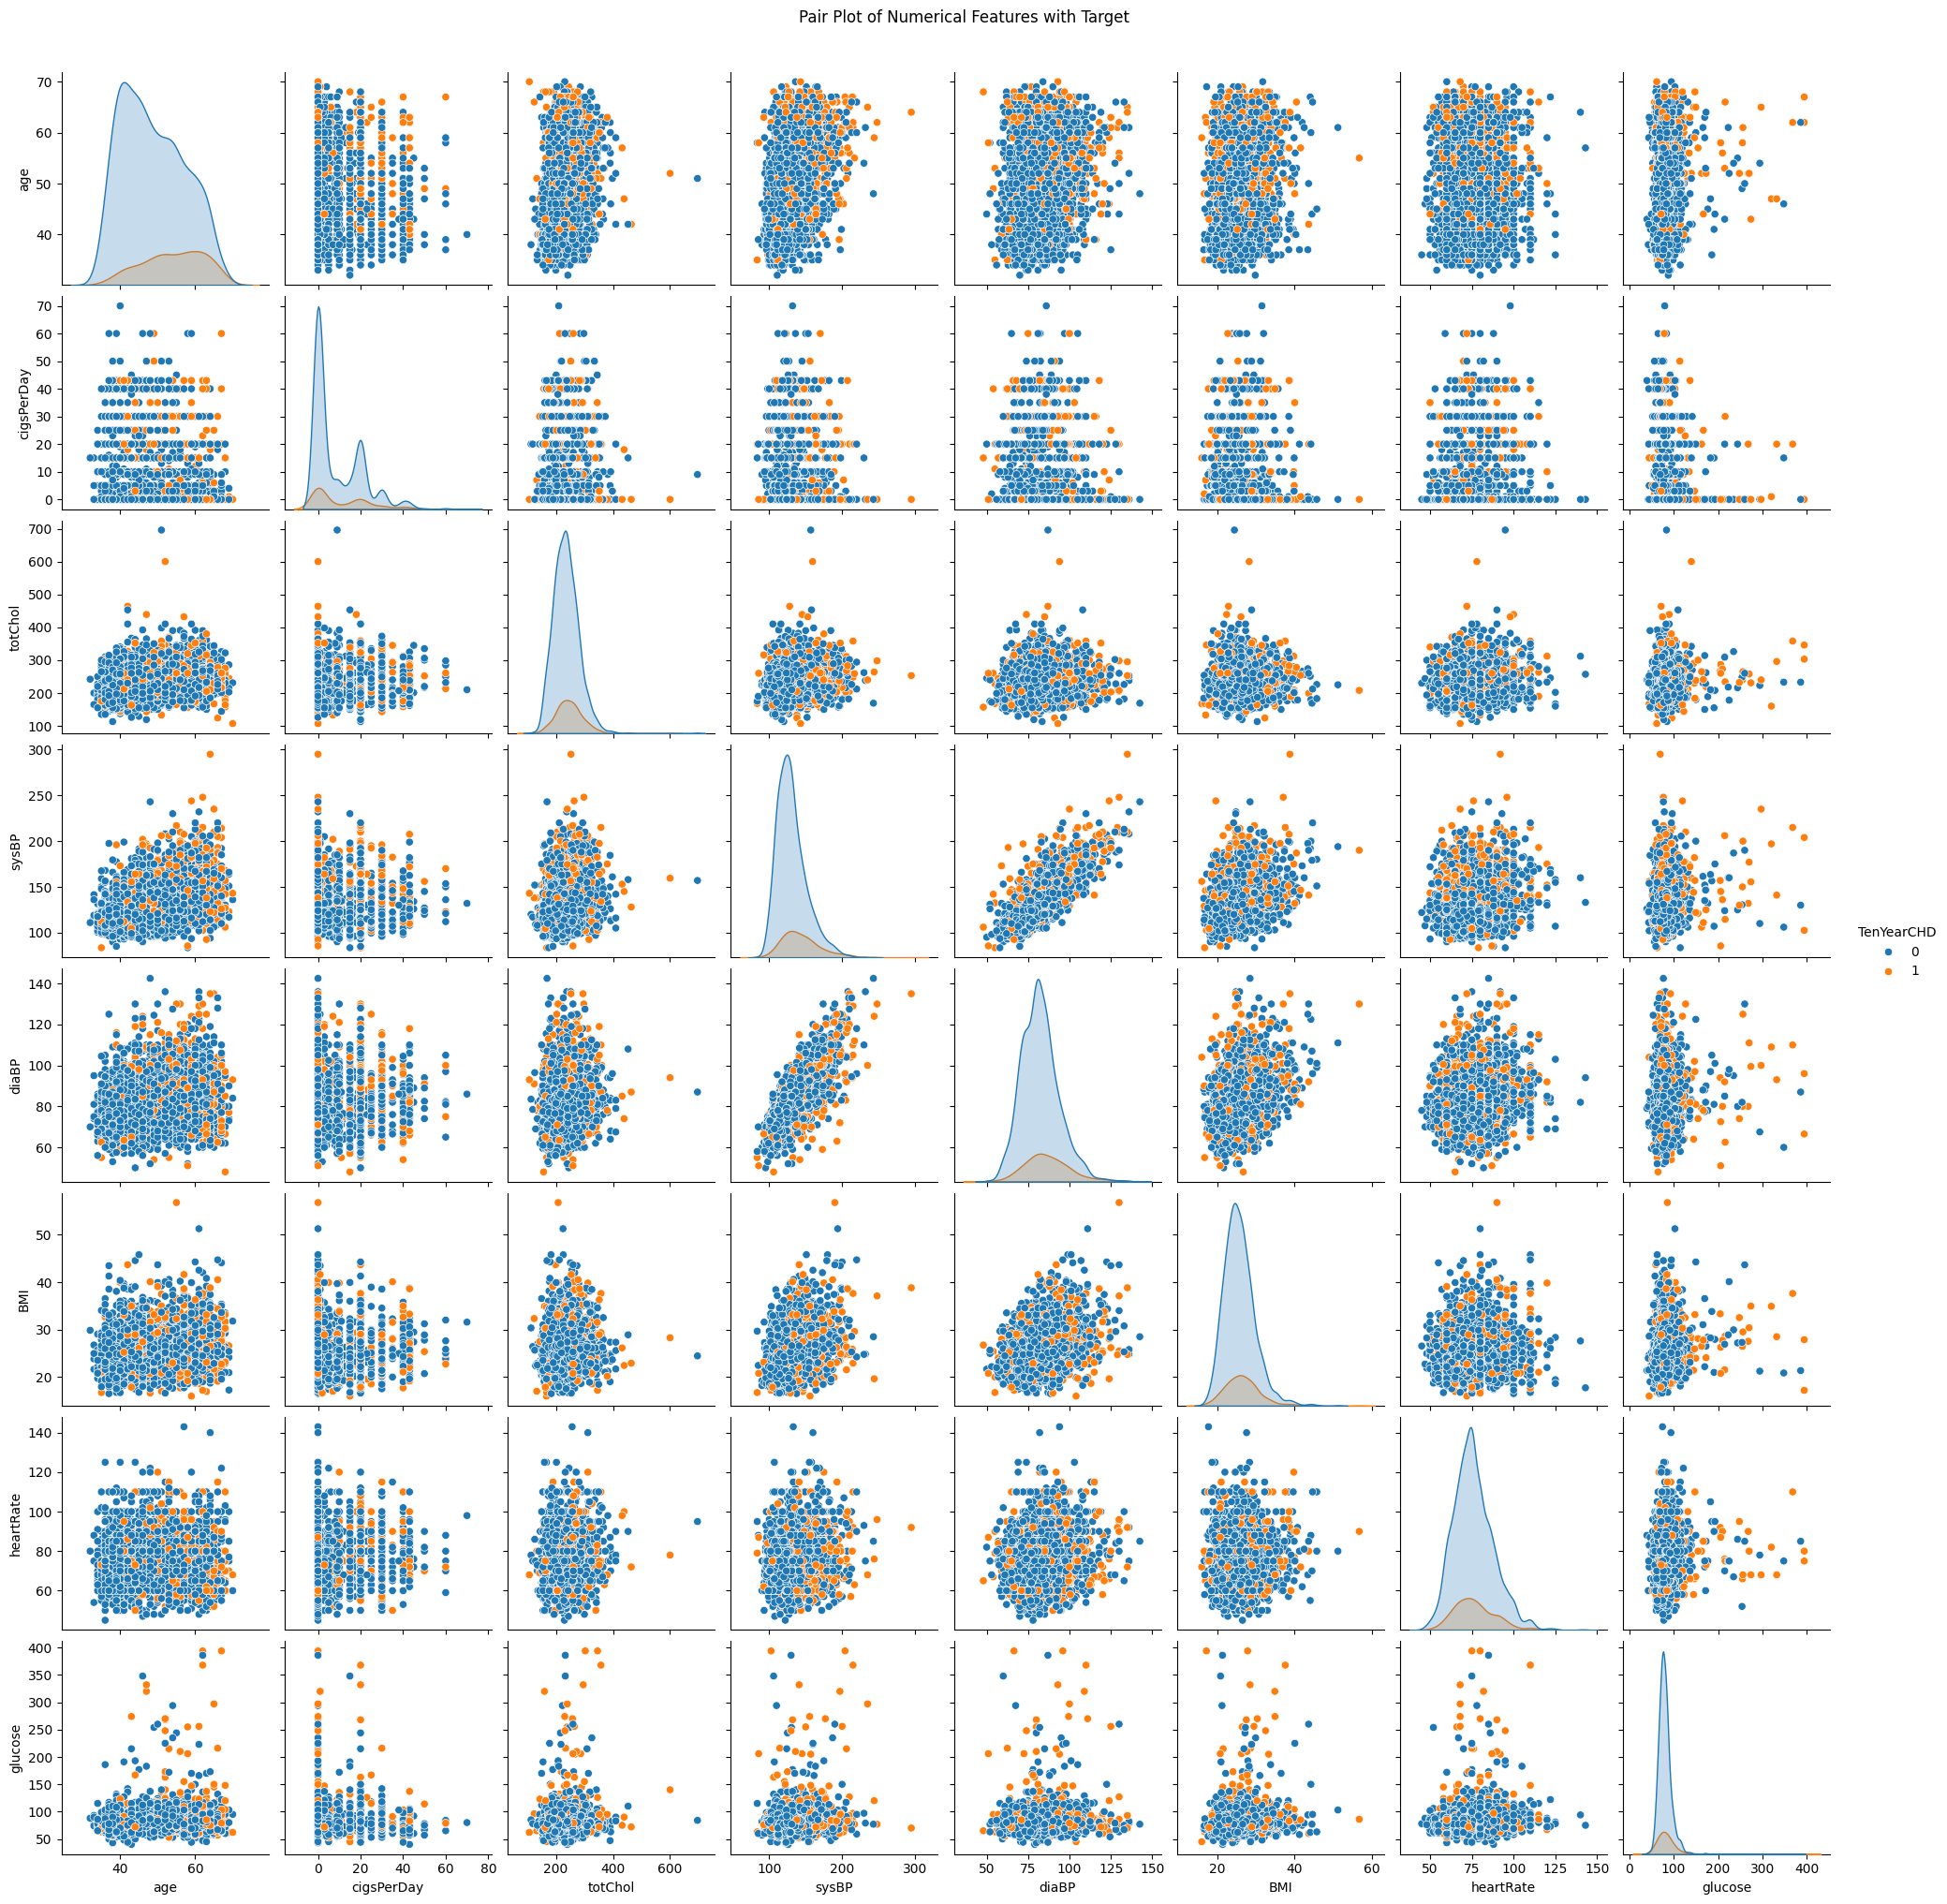

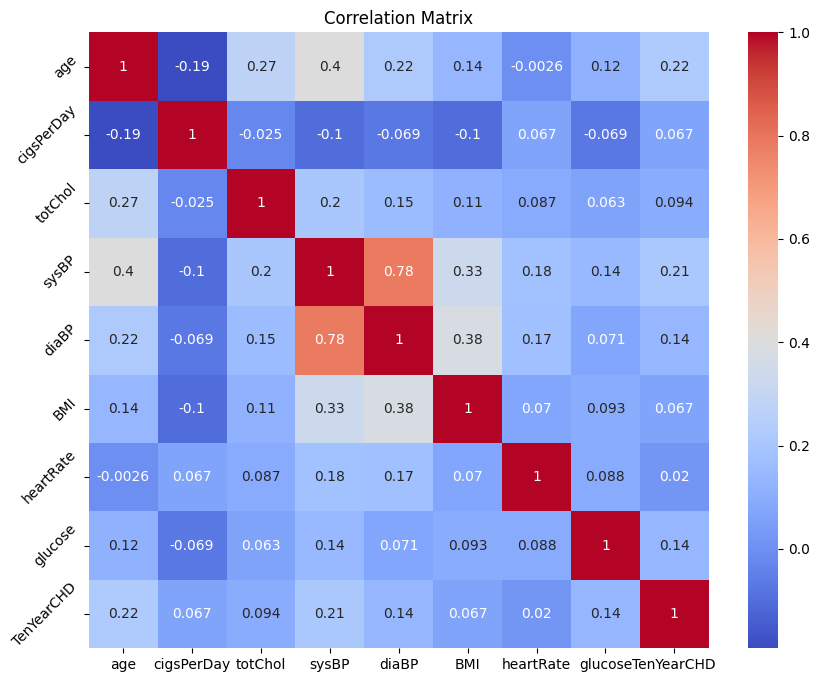

In [7]:
numerical_features = ['age', 'cigsPerDay', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose']
categorical_features = ['education', 'sex', 'is_smoking', 'BPMeds', 'prevalentStroke', 'prevalentHyp', 'diabetes']

df[numerical_features].hist(bins=20, figsize=(15, 10))
plt.suptitle('Numerical Feature Distributions', y=0.92)
plt.show()

plt.figure(figsize=(12, 10))
for i, col in enumerate(categorical_features):
    plt.subplot(3, 3, i + 1)
    sns.countplot(x=col, data=df)
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

plt.figure(figsize=(6, 4))
sns.countplot(x=target, data=df)
plt.title('Distribution of Target Variable (TenYearCHD)')
plt.show()

plt.figure(figsize=(15, 10))
sns.boxplot(data=df[numerical_features], orient="v")
plt.title('Box Plots of Numerical Features')
plt.xticks(rotation=45)
plt.show()

for col in categorical_features:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=col, y='age', data=df)
    plt.title(f'Age by {col}')
    plt.xticks(rotation=45)
    plt.show()
    
sns.pairplot(df[numerical_features + [target]], hue=target, diag_kind='kde')
plt.suptitle('Pair Plot of Numerical Features with Target', y=1.02)
plt.show()

corr_matrix = df[numerical_features + [target]].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.yticks(rotation=45)
plt.show()

In [8]:
kf = KFold(n_splits=12)
get_cvs = lambda model, xtr, ytr: list(map(lambda x: round(x*100, 3), cross_val_score(model, xtr, ytr, cv=kf, scoring='r2')))

In [9]:
x = df.drop(['TenYearCHD'], axis=1)

target = y = df['TenYearCHD']

print(f"\nFeatures shape: {x.shape}")
print(f"Target shape: {y.shape}")


Features shape: (3390, 15)
Target shape: (3390,)


In [10]:
def one_hot_encode_inst_fillna(series):
    most_frequent = series.mode()[0] if not series.mode().empty else None
    filled_series = series.fillna(most_frequent)
    encoder = OneHotEncoder(handle_unknown='ignore', drop='first', sparse_output=False)
    encoded_array = encoder.fit_transform(filled_series.values.reshape(-1, 1))
    encoded_df = pd.DataFrame(encoded_array, columns=encoder.get_feature_names_out([series.name + '_']))
    return encoded_df

def numerical_encode_inst_fillna(series):
    median_value = series.median()
    filled_series = series.fillna(median_value)
    scaler = StandardScaler()
    scaled_array = scaler.fit_transform(filled_series.values.reshape(-1, 1))
    scaled_series = pd.Series(scaled_array.flatten(), name=series.name + '_scaled')
    return scaled_series

df_processed = df.copy(deep=True)

for col in categorical_features:
    if col in df_processed.columns:
        encoded_col_df = one_hot_encode_inst_fillna(df_processed[col])
        df_processed = pd.concat([df_processed, encoded_col_df], axis=1)
        df_processed = df_processed.drop(col, axis=1, errors='ignore')

for col in numerical_features:
    if col in df_processed.columns:
        scaled_col_series = numerical_encode_inst_fillna(df_processed[col])
        df_processed = pd.concat([df_processed, scaled_col_series], axis=1)
        df_processed = df_processed.drop(col, axis=1, errors='ignore')

df_processed.sample(10).sort_index()

TenYearCHD  education__2.0  education__3.0  education__4.0  sex__M  \
709            0             0.0             0.0             0.0     1.0   
1036           0             1.0             0.0             0.0     1.0   
1093           0             0.0             1.0             0.0     1.0   
1503           0             0.0             0.0             0.0     0.0   
1538           0             1.0             0.0             0.0     1.0   
1573           0             1.0             0.0             0.0     1.0   
1911           0             0.0             0.0             0.0     1.0   
2334           0             0.0             0.0             0.0     1.0   
2929           1             0.0             0.0             0.0     0.0   
3010           0             0.0             0.0             0.0     0.0   

      is_smoking__YES  BPMeds__1.0  prevalentStroke__1  prevalentHyp__1  \
709               0.0          0.0                 0.0              1.0   
1036              0.0          0.0                 0.0              0.0   
1093              0.0          0.0                 0.0              1.0   
1503              0.0          0.0                 0.0              0.0   
1538              1.0          0.0                 0.0              0.0   
1573              0.0          0.0                 0.0              1.0   
1911              1.0          0.0                 0.0              0.0   
2334              0.0          0.0                 0.0              1.0   
2929              0.0          0.0                 0.0              1.0   
3010              0.0          0.0                 0.0              1.0   

      diabetes__1  age_scaled  cigsPerDay_scaled  totChol_scaled  \
709           0.0   -0.179499          -0.759679       -0.778878   
1036          0.0   -1.459817          -0.759679       -0.200940   
1093          0.0   -1.343425          -0.759679        0.332540   
1503          0.0    0.635250          -0.759679        2.088581   
1538          0.0    0.751642           0.926507       -1.134532   
1573          0.0   -0.994247          -0.759679        0.732651   
1911          0.0   -0.295891           1.769600        0.510367   
2334          0.0    1.799176          -0.759679       -0.912248   
2929          0.0    0.402464          -0.759679        1.466187   
3010          0.0    0.518857          -0.759679        1.532872   

      sysBP_scaled  diaBP_scaled  BMI_scaled  heartRate_scaled  glucose_scaled  
709       0.242222      1.091097    0.530084         -0.666507        0.141634  
1036     -0.879421      0.009729   -0.239442         -1.502044       -0.376549  
1093     -0.341032      0.758369   -0.261359         -1.334937       -0.549276  
1503     -0.206435      0.092911   -1.123424         -0.499400       -0.247003  
1538     -0.744824     -1.321186   -0.285711         -0.499400        0.055270  
1573      1.094670      1.507008    1.781783         -0.081631       -0.290185  
1911     -0.969152     -1.071639   -0.568196         -0.833615       -0.462913  
2334      1.094670      0.259276    0.138015         -0.499400       -0.074275  
2929     -0.206435      0.675186    0.379101         -1.334937       -0.203821  
3010      2.799567      2.255648    1.535827         -0.332292       -0.592458

In [11]:
x_train, x_test, y_train, y_test = train_test_split(df_processed, y, test_size=0.3, random_state=68, stratify=y)

In [12]:
print(f"\nProcessed training features shape: {x_train.shape}")
print(f"Processed testing features shape: {x_test.shape}")


Processed training features shape: (2373, 18)
Processed testing features shape: (1017, 18)


e:\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
e:\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
e:\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
e:\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
e:\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
e:\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


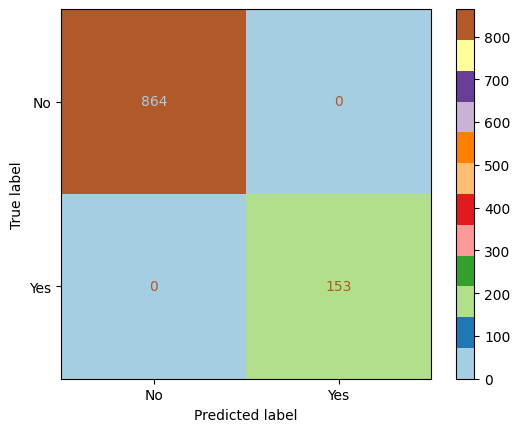

Absolute Difference Between Training and Testing Accuracy : 0.0


Model  Cross Val Score  Train Acc  Test Acc  Precision  \
1  Logistic Regression            100.0      100.0     100.0        1.0   

   Recall  F1-Score  
1     1.0       1.0

In [13]:
LR = LogisticRegression(C=0.5, penalty='elasticnet', solver='saga', max_iter=135, l1_ratio=0.01)

LR.fit(x_train, y_train)

y_pred = LR.predict(x_test)

training_acc = LR.score(x_train, y_train) * 100
testing_acc = LR.score(x_test, y_test) * 100

diff = abs(training_acc - testing_acc)

scores.loc[1] = ['Logistic Regression', mean(get_cvs(LR, x_train, y_train)), training_acc, testing_acc, precision_score(y_test, y_pred), recall_score(y_test, y_pred), f1_score(y_test, y_pred), ]

conf_matrix = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(conf_matrix, display_labels=['No', 'Yes'])
disp.plot(cmap='Paired')
plt.show()

print(f'Absolute Difference Between Training and Testing Accuracy : {diff}')
scores

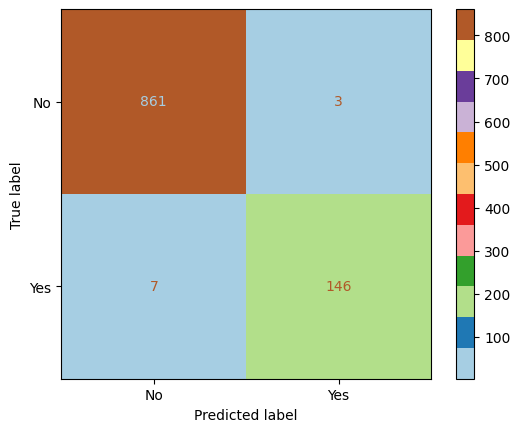

Absolute Difference Between Training and Testing Accuracy : 0.2247506672285482


Model  Cross Val Score   Train Acc    Test Acc  \
1           Logistic Regression        100.00000  100.000000  100.000000   
2  Decision Tree Classification         63.17375   99.241466   99.016716   

   Precision    Recall  F1-Score  
1   1.000000  1.000000  1.000000  
2   0.979866  0.954248  0.966887

In [14]:
DTC = DecisionTreeClassifier(criterion='entropy', max_depth=6, max_features='log2', min_samples_leaf= 5, min_samples_split=10, random_state=50)

DTC.fit(x_train, y_train)

y_pred = DTC.predict(x_test)

training_acc = DTC.score(x_train, y_train) * 100
testing_acc = DTC.score(x_test, y_test) * 100

diff = abs(training_acc - testing_acc)

scores.loc[2] = ['Decision Tree Classification', mean(get_cvs(DTC, x_train, y_train)), training_acc, testing_acc, precision_score(y_test, y_pred), recall_score(y_test, y_pred), f1_score(y_test, y_pred), ]

conf_matrix = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(conf_matrix, display_labels=['No', 'Yes'])
disp.plot(cmap='Paired')
plt.show()

print(f'Absolute Difference Between Training and Testing Accuracy : {diff}')
scores

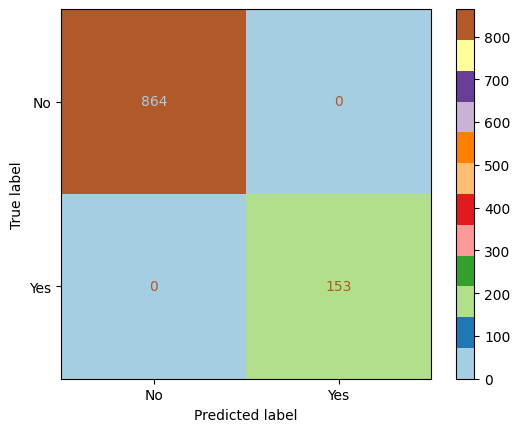

Absolute Difference Between Training and Testing Accuracy : 0.0


Model  Cross Val Score   Train Acc    Test Acc  \
1           Logistic Regression        100.00000  100.000000  100.000000   
2  Decision Tree Classification         63.17375   99.241466   99.016716   
3  Random Forest Classification        100.00000  100.000000  100.000000   

   Precision    Recall  F1-Score  
1   1.000000  1.000000  1.000000  
2   0.979866  0.954248  0.966887  
3   1.000000  1.000000  1.000000

In [15]:
RFC = RandomForestClassifier(n_estimators=100, criterion='entropy', max_depth=6, max_features='log2', min_samples_leaf=6, min_samples_split=10, bootstrap=True, random_state=36)

RFC.fit(x_train, y_train)

y_pred = RFC.predict(x_test)

training_acc = RFC.score(x_train, y_train) * 100
testing_acc = RFC.score(x_test, y_test) * 100

diff = abs(training_acc - testing_acc)

scores.loc[3] = ['Random Forest Classification', mean(get_cvs(RFC, x_train, y_train)), training_acc, testing_acc, precision_score(y_test, y_pred), recall_score(y_test, y_pred), f1_score(y_test, y_pred), ]

conf_matrix = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(conf_matrix, display_labels=['No', 'Yes'])
disp.plot(cmap='Paired')
plt.show()

print(f'Absolute Difference Between Training and Testing Accuracy : {diff}')
scores

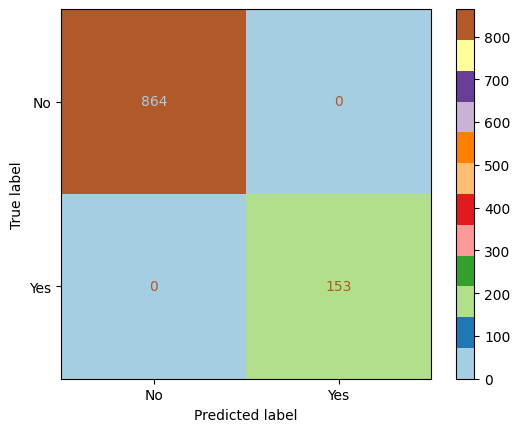

Absolute Difference Between Training and Testing Accuracy : 0.0


Model  Cross Val Score   Train Acc    Test Acc  \
1           Logistic Regression        100.00000  100.000000  100.000000   
2  Decision Tree Classification         63.17375   99.241466   99.016716   
3  Random Forest Classification        100.00000  100.000000  100.000000   
4  Support Vector Classfication        100.00000  100.000000  100.000000   

   Precision    Recall  F1-Score  
1   1.000000  1.000000  1.000000  
2   0.979866  0.954248  0.966887  
3   1.000000  1.000000  1.000000  
4   1.000000  1.000000  1.000000

In [16]:
SVM = SVC(C=np.float64(1.3292918943162166), class_weight=None, coef0=np.float64(-0.8165652101338362), degree=5, gamma='scale', kernel='linear', probability=True,shrinking=False)
SVM.fit(x_train, y_train)

y_pred = SVM.predict(x_test)

training_acc = SVM.score(x_train, y_train) * 100
testing_acc = SVM.score(x_test, y_test) * 100

diff = abs(training_acc - testing_acc)

scores.loc[4] = ['Support Vector Classfication', mean(get_cvs(SVM, x_train, y_train)), training_acc, testing_acc, precision_score(y_test, y_pred), recall_score(y_test, y_pred), f1_score(y_test, y_pred), ]

conf_matrix = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(conf_matrix, display_labels=['No', 'Yes'])
disp.plot(cmap='Paired')
plt.show()

print(f'Absolute Difference Between Training and Testing Accuracy : {diff}')
scores

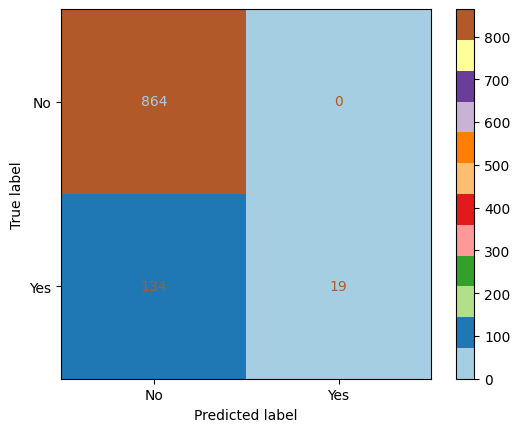

Absolute Difference Between Training and Testing Accuracy : 0.5759235847731361


Model  Cross Val Score   Train Acc    Test Acc  \
1                Logistic Regression        100.00000  100.000000  100.000000   
2       Decision Tree Classification         63.17375   99.241466   99.016716   
3       Random Forest Classification        100.00000  100.000000  100.000000   
4       Support Vector Classfication        100.00000  100.000000  100.000000   
5  K Nearest Neighbors Classfication        -10.86425   87.399916   86.823992   

   Precision    Recall  F1-Score  
1   1.000000  1.000000  1.000000  
2   0.979866  0.954248  0.966887  
3   1.000000  1.000000  1.000000  
4   1.000000  1.000000  1.000000  
5   1.000000  0.124183  0.220930

In [17]:
KNC = KNeighborsClassifier(n_neighbors=19)
KNC.fit(x_train, y_train)

y_pred = KNC.predict(x_test)

training_acc = KNC.score(x_train, y_train) * 100
testing_acc = KNC.score(x_test, y_test) * 100

diff = abs(training_acc - testing_acc)

scores.loc[5] = ['K Nearest Neighbors Classfication', mean(get_cvs(KNC, x_train, y_train)), training_acc, testing_acc, precision_score(y_test, y_pred), recall_score(y_test, y_pred), f1_score(y_test, y_pred), ]

conf_matrix = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(conf_matrix, display_labels=['No', 'Yes'])
disp.plot(cmap='Paired')
plt.show()

print(f'Absolute Difference Between Training and Testing Accuracy : {diff}')
scores

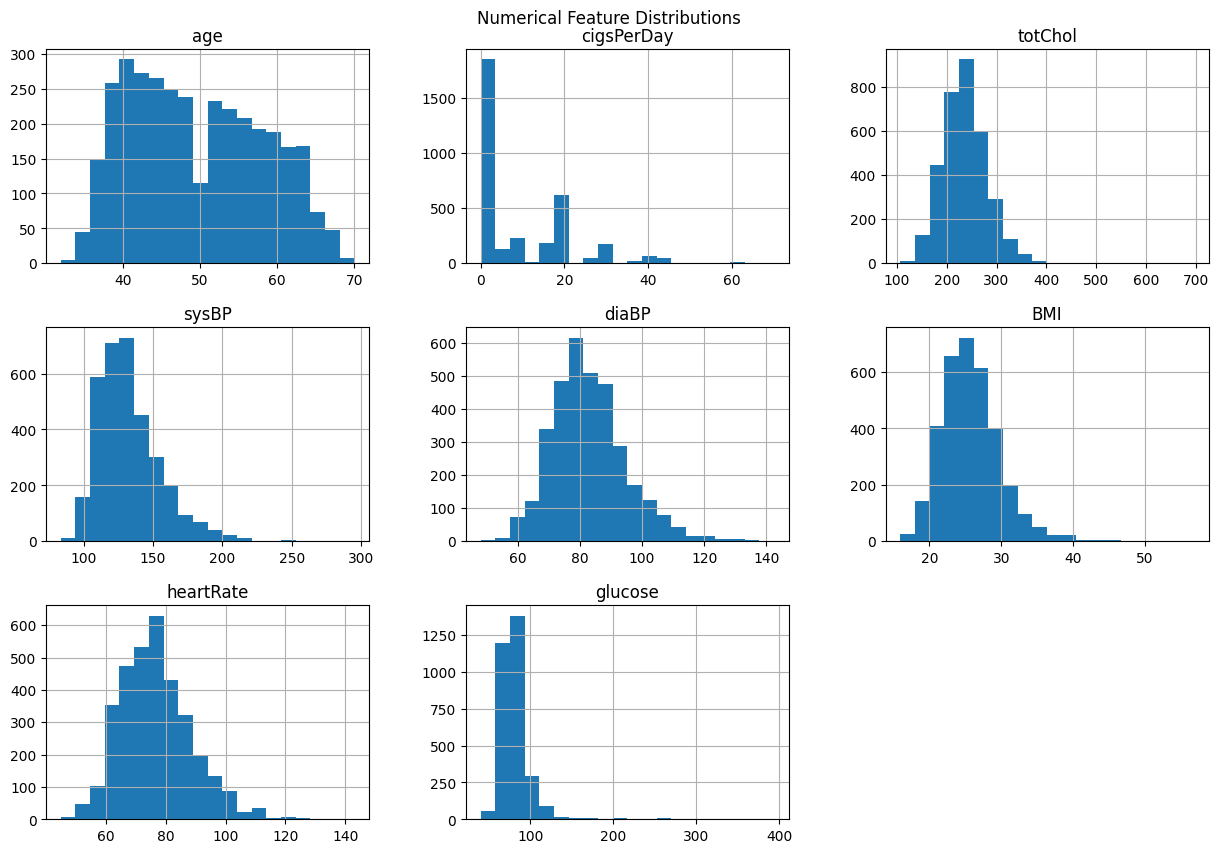

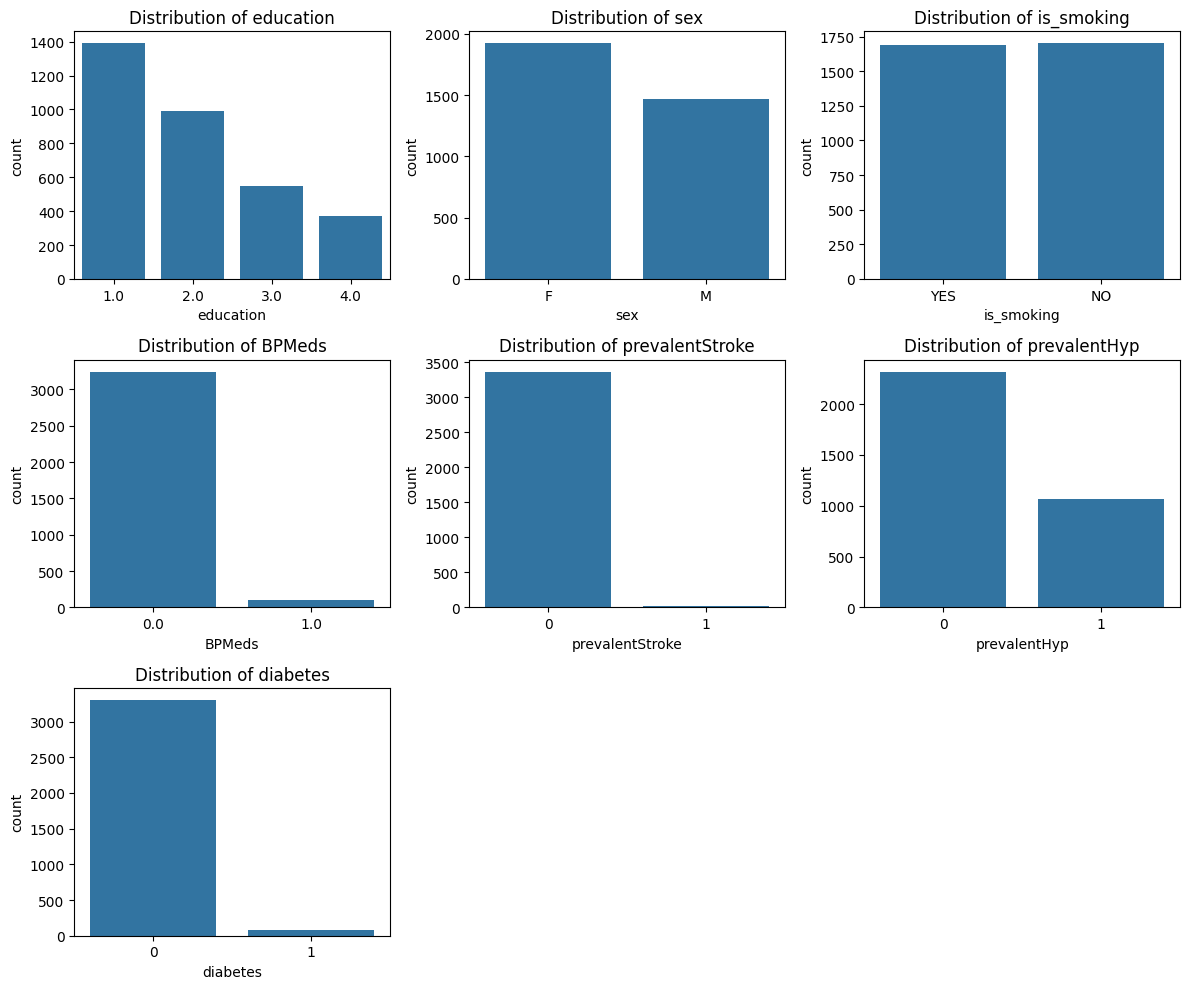

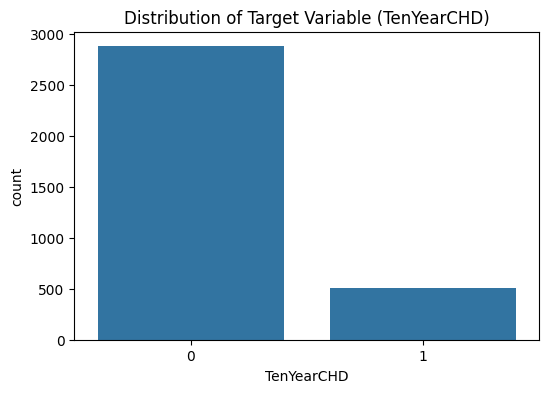

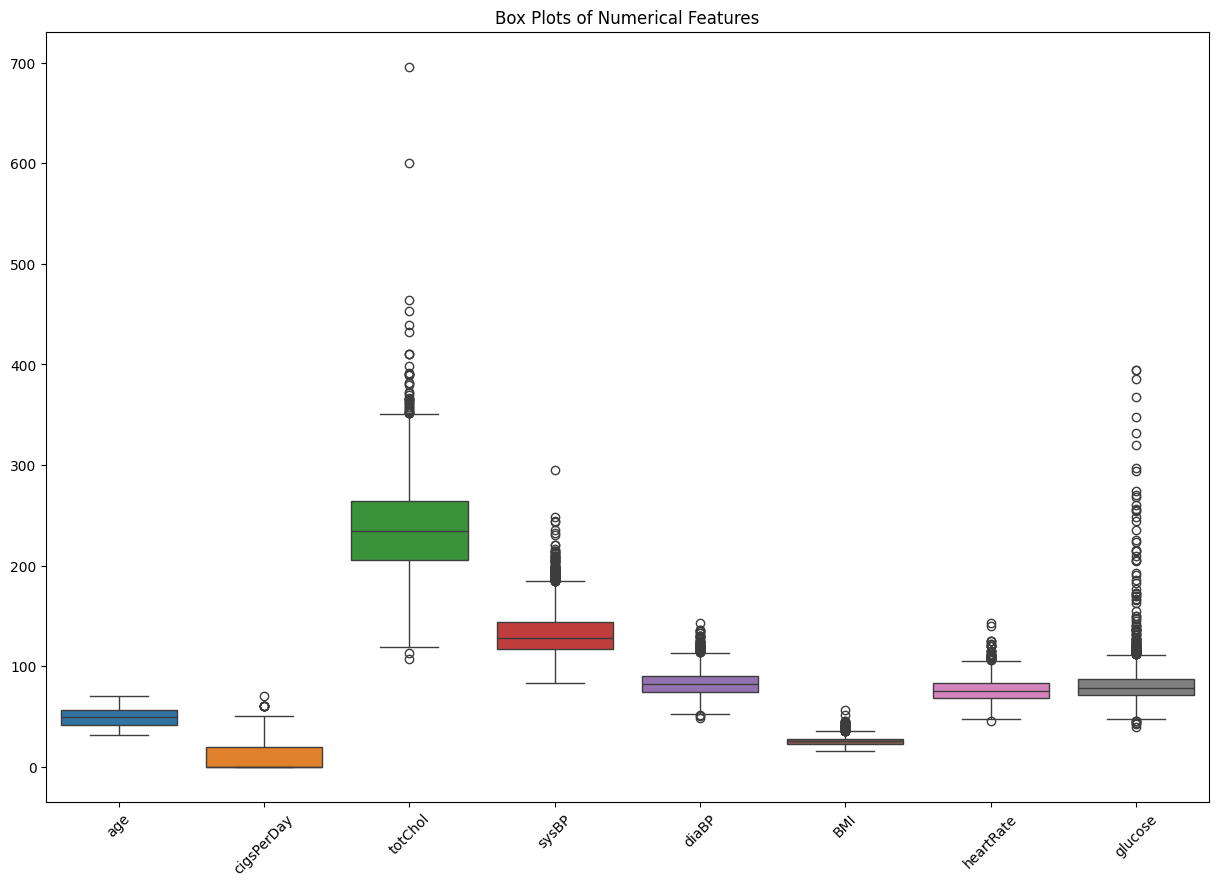

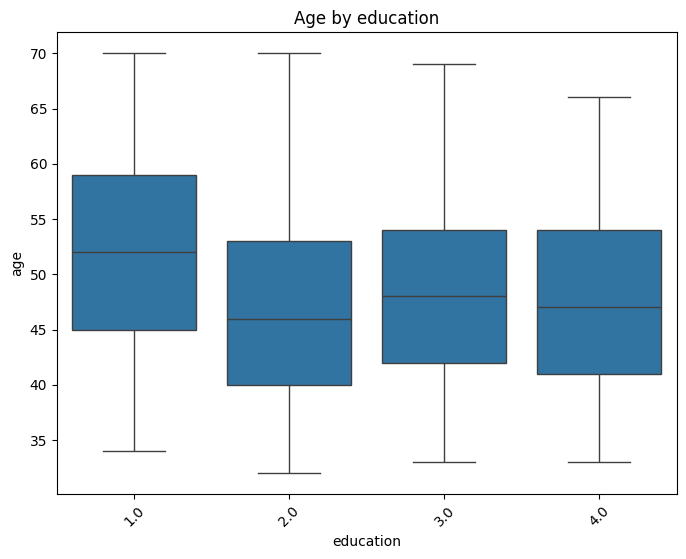

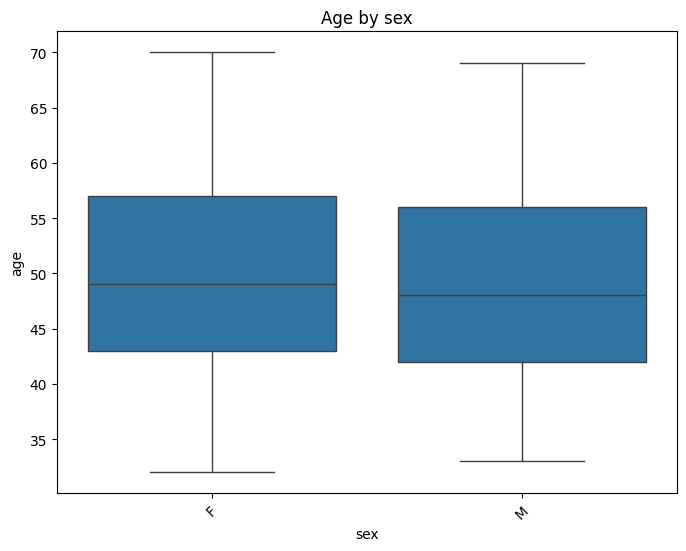

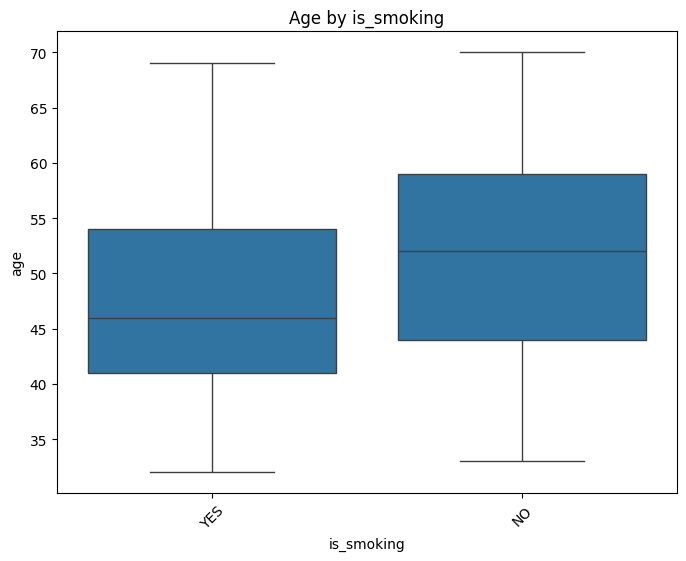

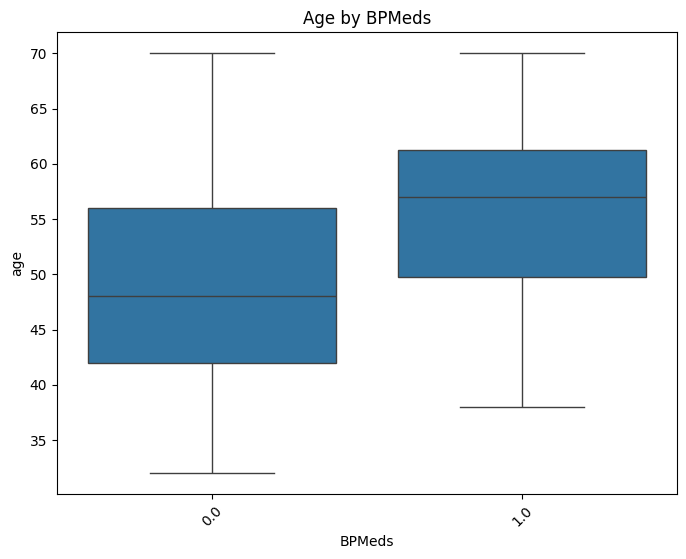

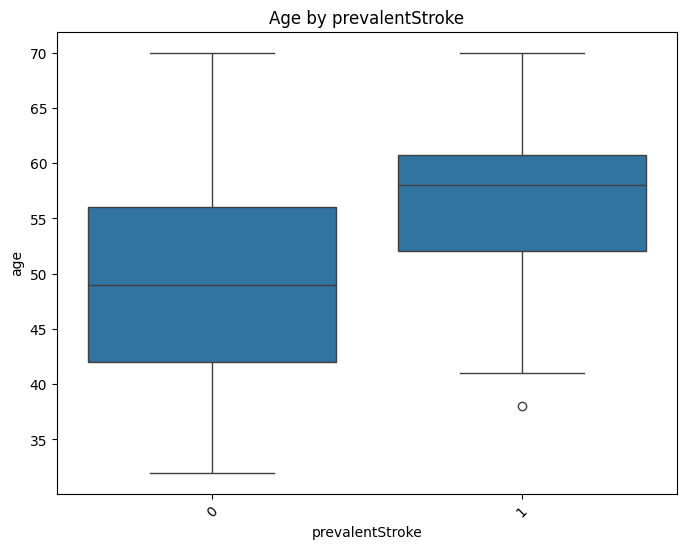

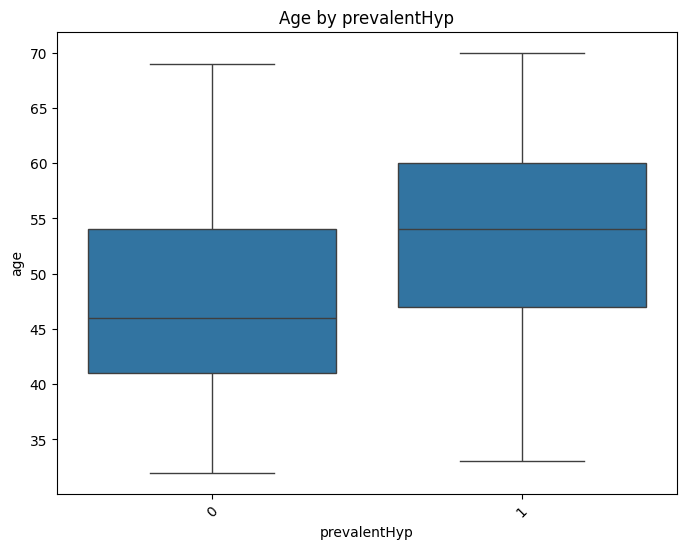

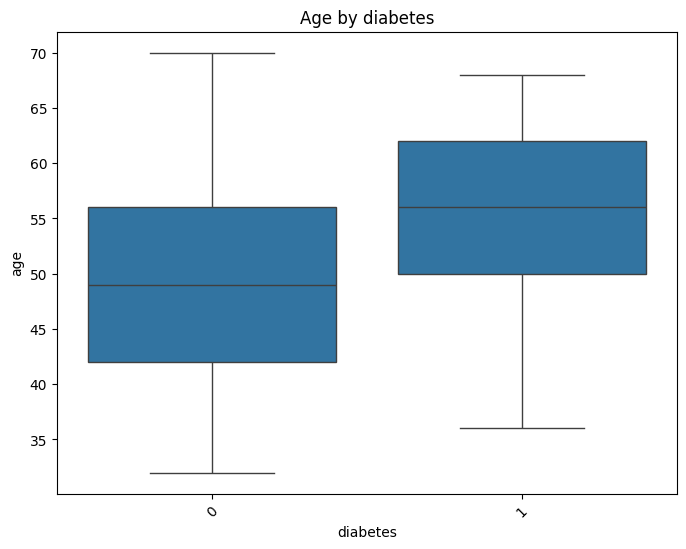

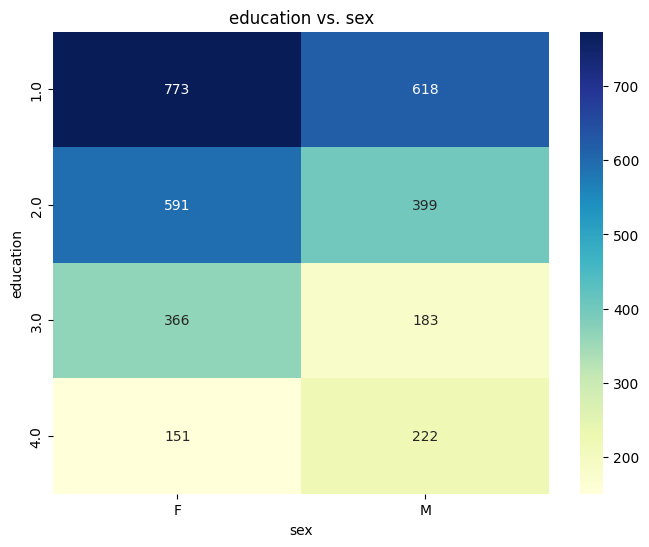

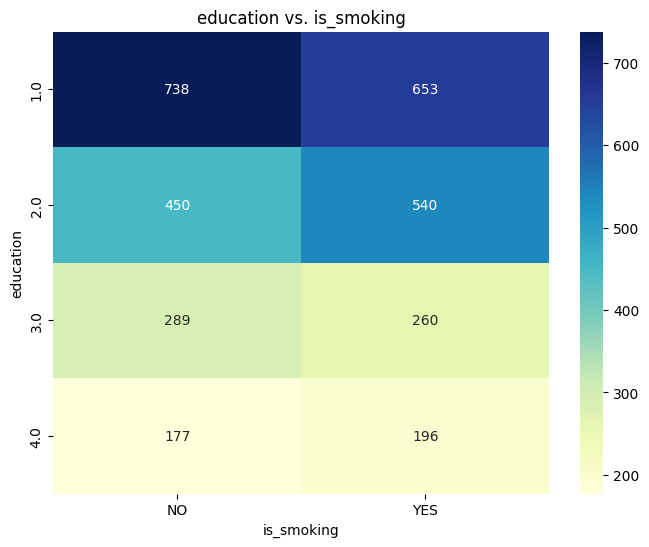

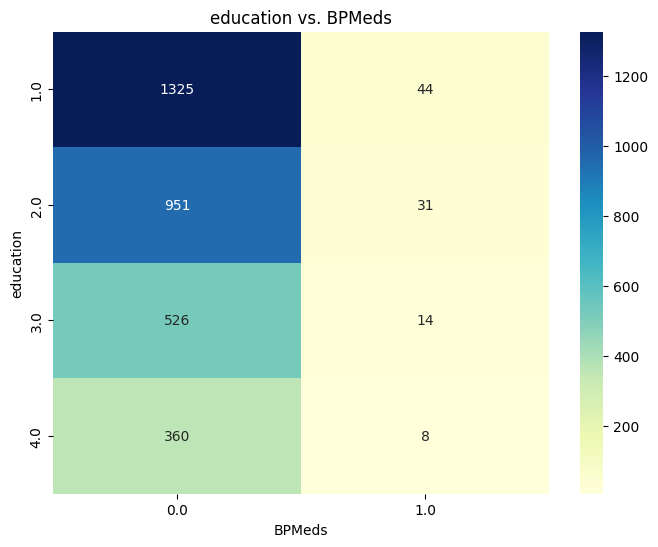

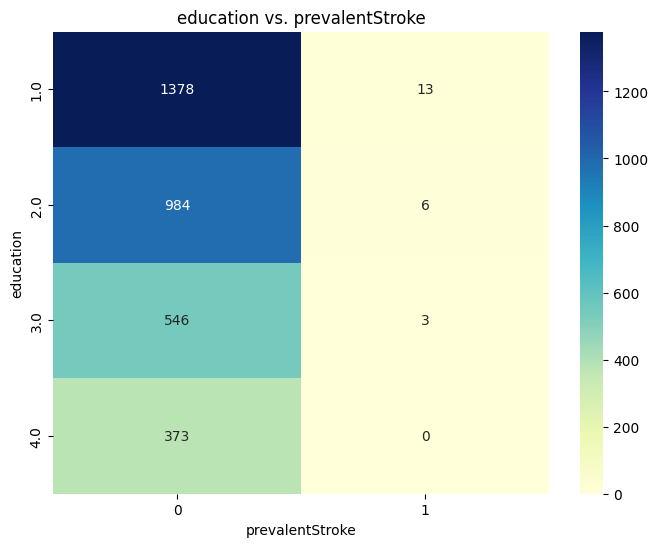

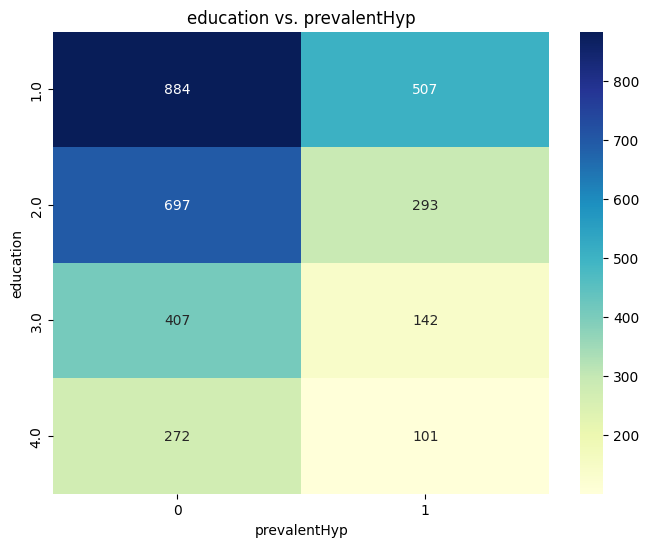

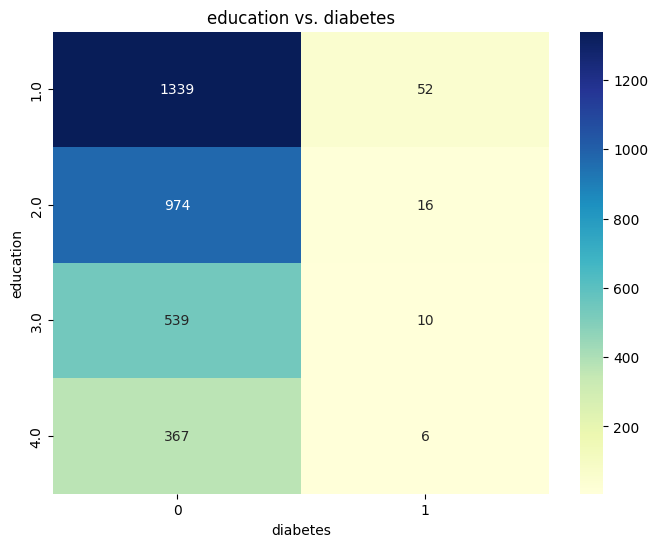

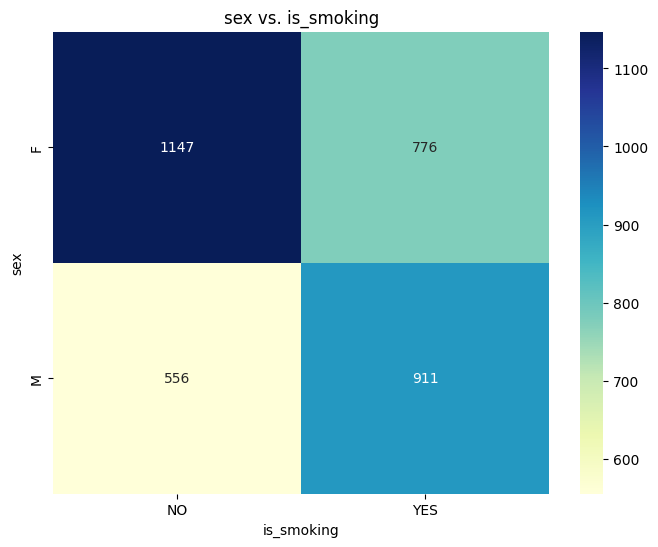

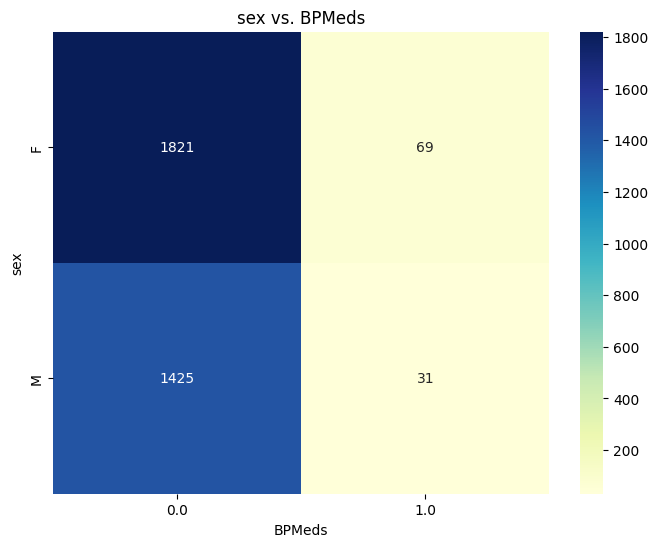

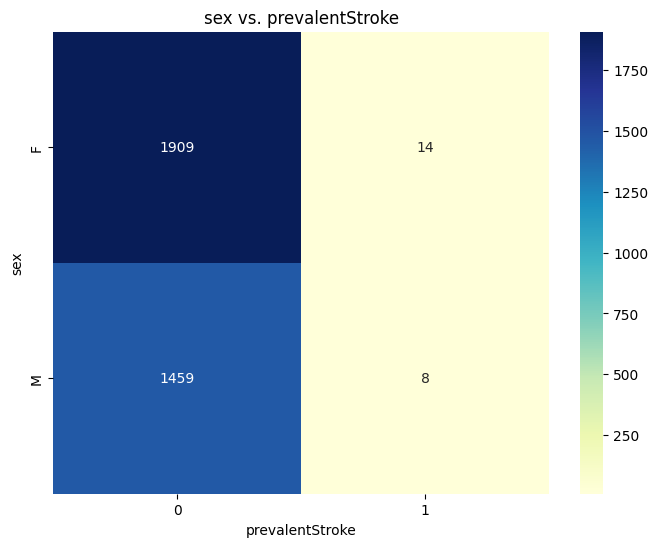

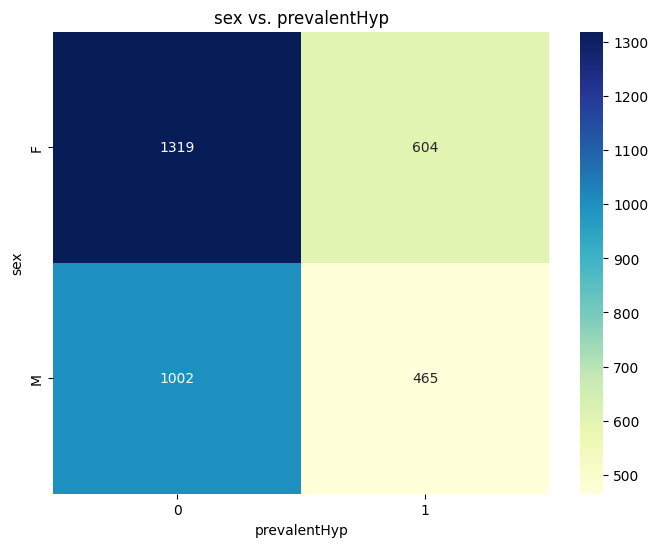

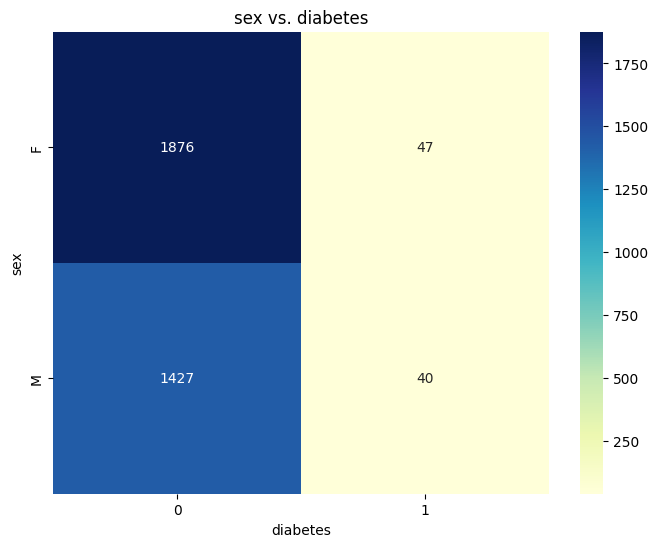

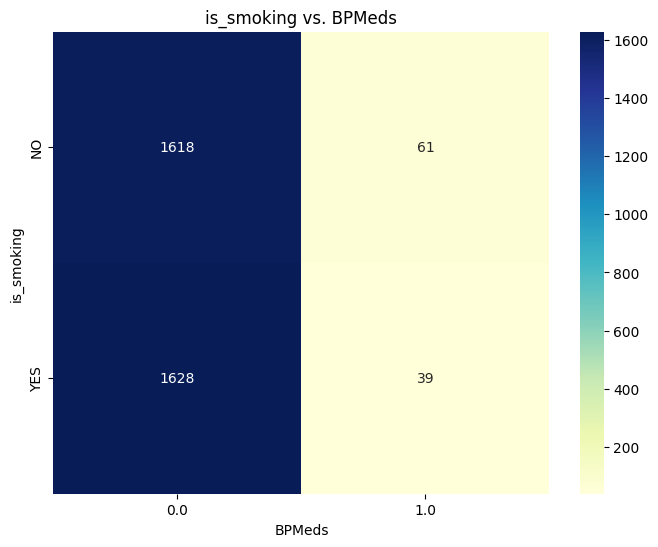

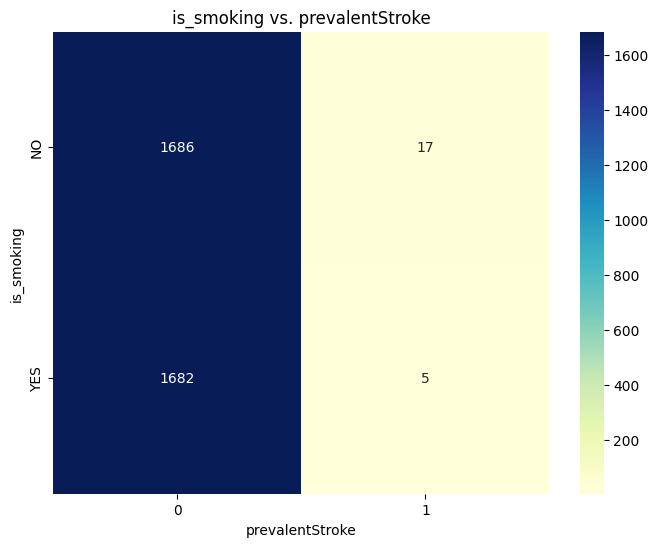

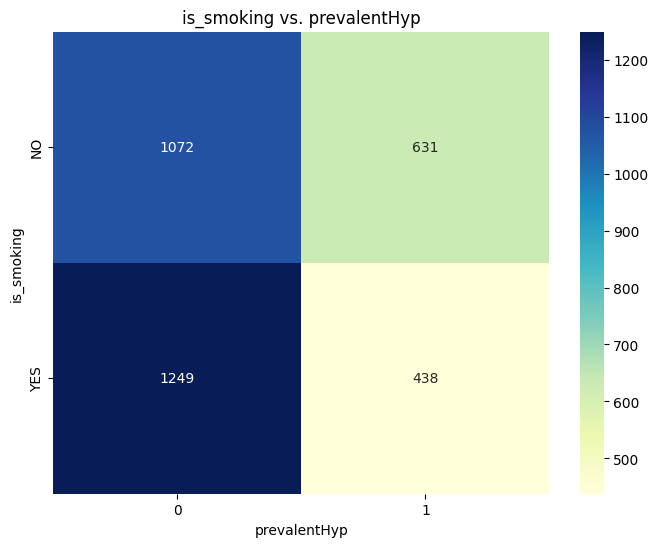

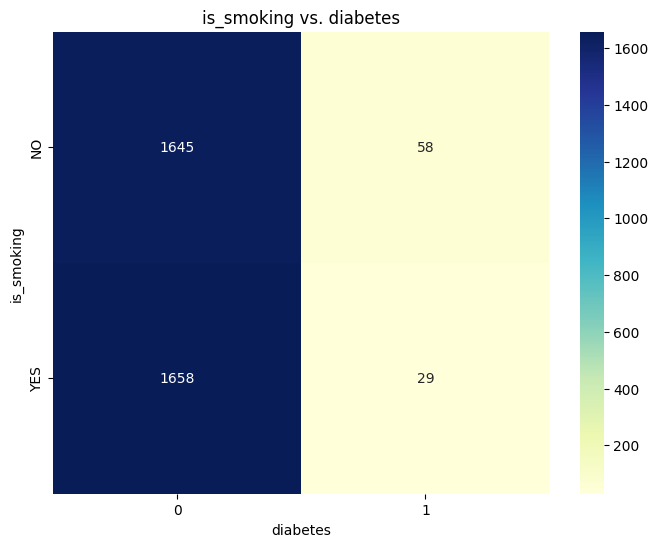

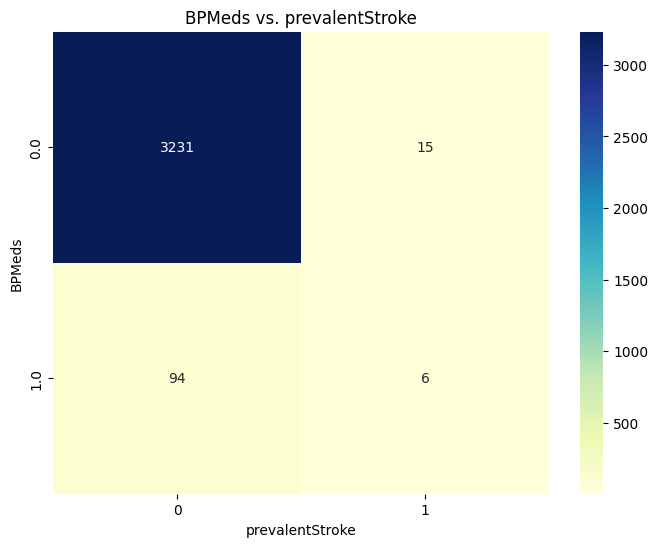

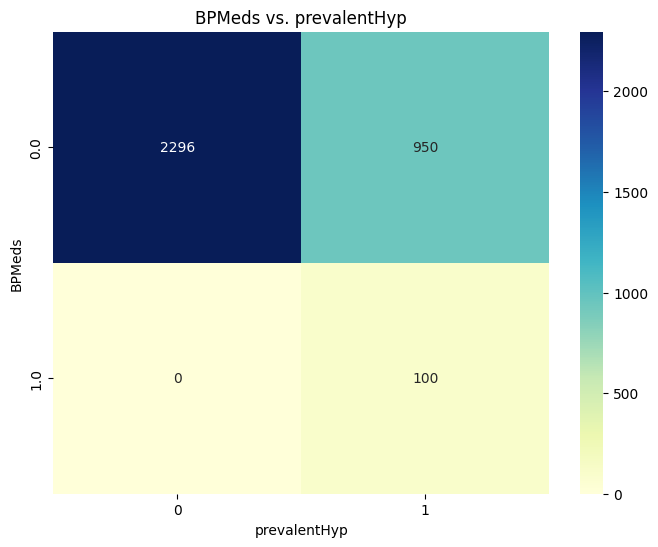

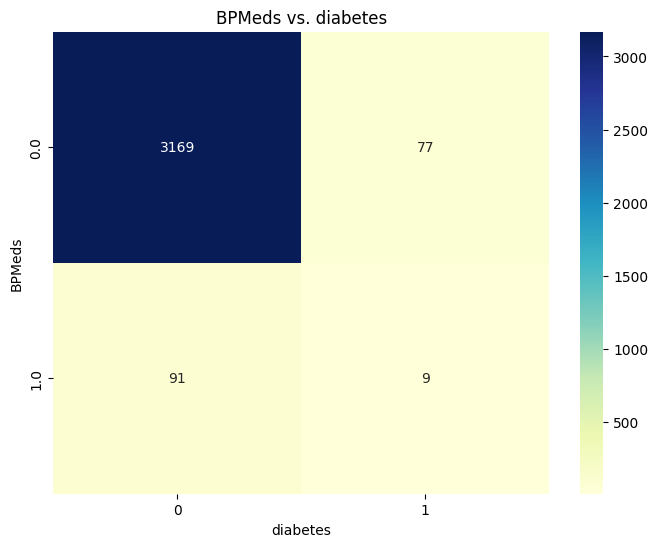

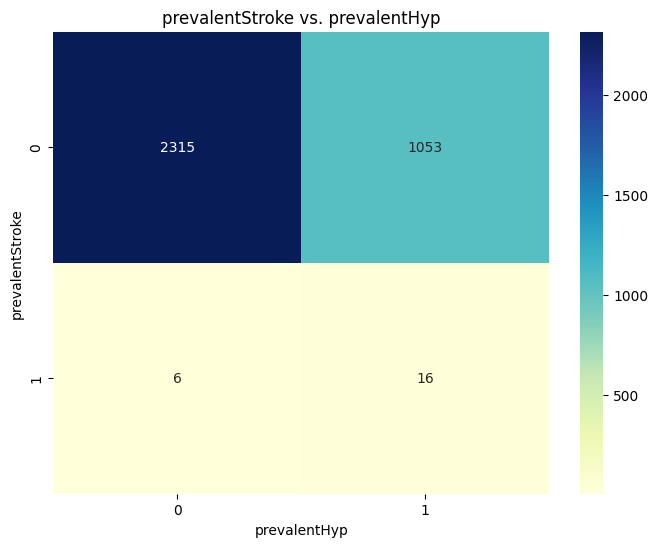

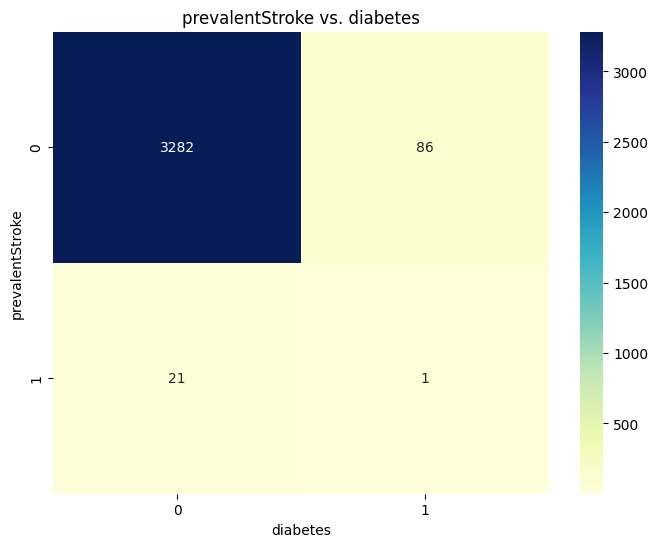

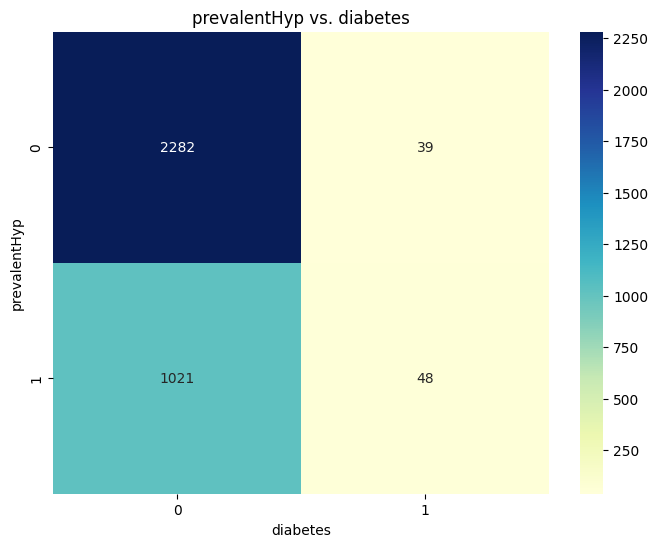

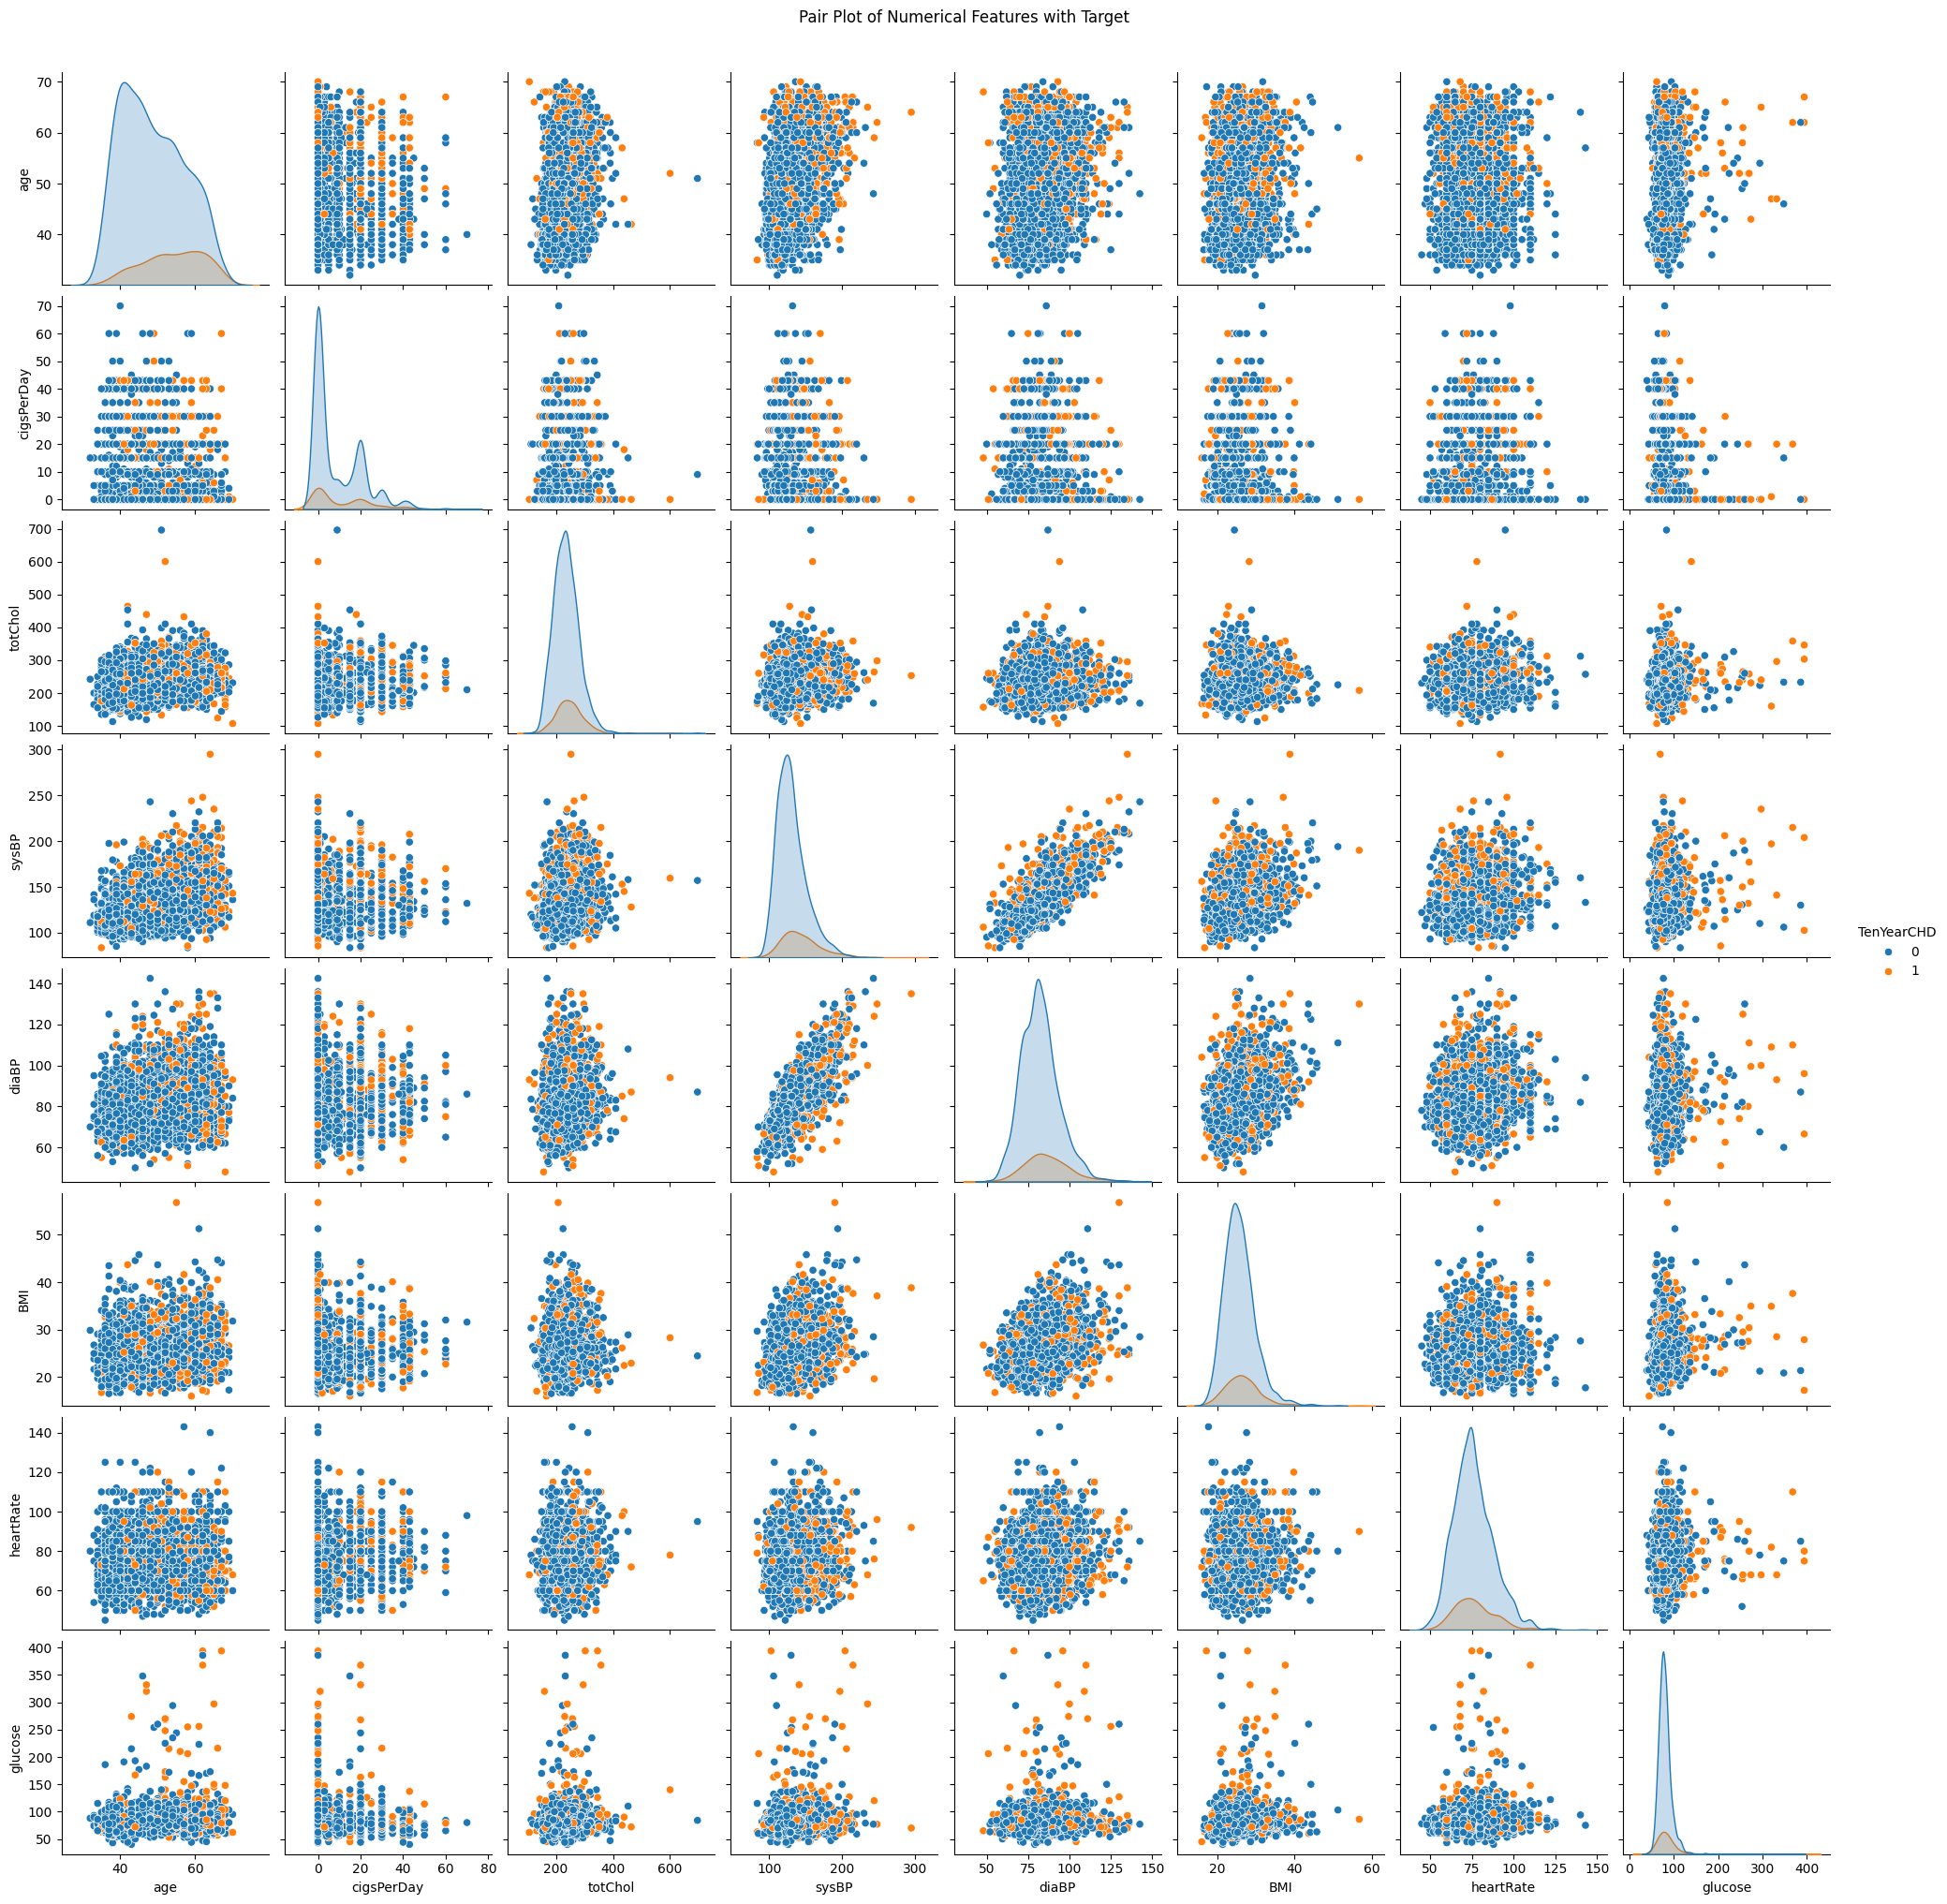

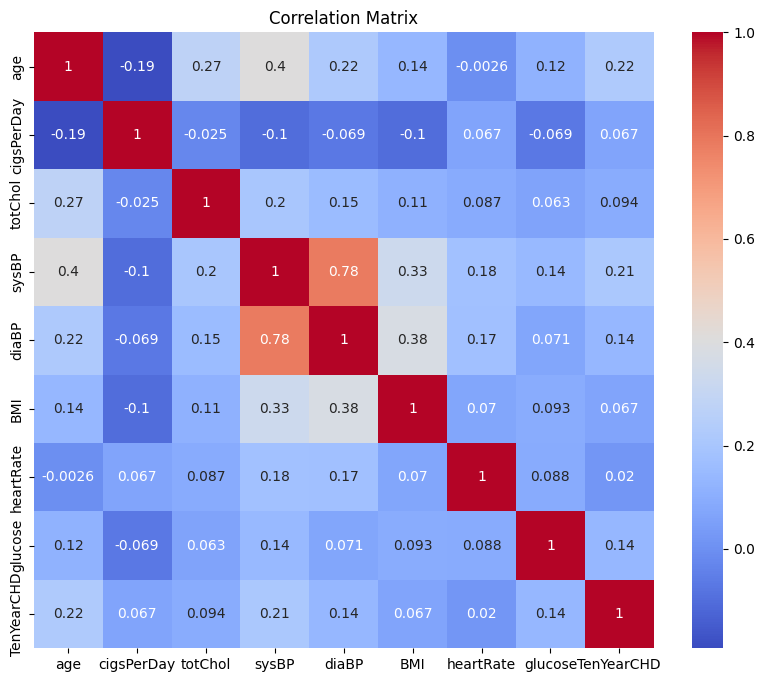

In [18]:
target = 'TenYearCHD'

df[numerical_features].hist(bins=20, figsize=(15, 10))
plt.suptitle('Numerical Feature Distributions', y=0.92)
plt.show()

plt.figure(figsize=(12, 10))
for i, col in enumerate(categorical_features):
    plt.subplot(3, 3, i + 1)
    sns.countplot(x=col, data=df)
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

plt.figure(figsize=(6, 4))
sns.countplot(x=target, data=df)
plt.title('Distribution of Target Variable (TenYearCHD)')
plt.show()

plt.figure(figsize=(15, 10))
sns.boxplot(data=df[numerical_features], orient="v")
plt.title('Box Plots of Numerical Features')
plt.xticks(rotation=45)
plt.show()

for col in categorical_features:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=col, y='age', data=df)
    plt.title(f'Age by {col}')
    plt.xticks(rotation=45)
    plt.show()

for i in range(0, len(categorical_features)-1):
    for j in range(i+1, len(categorical_features)):
        contingency_table = pd.crosstab(df[categorical_features[i]], df[categorical_features[j]])
        plt.figure(figsize=(8, 6))
        sns.heatmap(contingency_table, annot=True, fmt='d', cmap='YlGnBu')
        plt.title(f'{categorical_features[i]} vs. {categorical_features[j]}')
        plt.show()

sns.pairplot(df[numerical_features + [target]], hue=target, diag_kind='kde')
plt.suptitle('Pair Plot of Numerical Features with Target', y=1.02)
plt.show()

corr_matrix = df[numerical_features + [target]].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()